<a href="https://colab.research.google.com/github/LatiefDataVisionary/fmcg-gelar-rasa-2025/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting your Google Drive, I will load the three CSV datasets from the `fmcg_personalcare` folder. Please ensure this folder exists in the root of your Google Drive and contains the CSV files.

In [ ]:
# Define the path to your ZIP file in Google Drive
zip_file_path = '/content/drive/My Drive/Dataset/fmcg_personalcare.zip'
# Define the directory where the contents will be extracted
extract_to_path = '/content/drive/My Drive/Dataset/fmcg_personalcare_extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
print(f"Attempting to extract '{zip_file_path}' to '{extract_to_path}'...")
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print(f"Successfully extracted '{zip_file_path}' to '{extract_to_path}'.")
except FileNotFoundError:
    print(f"Error: The zip file '{zip_file_path}' was not found. Please ensure it exists at this path.")
    raise
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path}' is not a valid zip file. Please check the file's integrity.")
    raise

# Now, define the folder path where your CSVs are located *inside* the extracted content.
# Assuming the zip file contains a top-level folder also named 'fmcg_personalcare'
folder_path = os.path.join(extract_to_path, 'fmcg_personalcare')

# Verify the extracted folder exists before proceeding
if not os.path.isdir(folder_path):
    print(f"Error: The expected extracted directory '{folder_path}' was not found after unzipping. ")
    print(f"Please check the contents of the extracted folder '{extract_to_path}'. Current contents: {os.listdir(extract_to_path)}")
    raise NotADirectoryError(f"Extracted folder '{folder_path}' not found.")


# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load each CSV file into a separate DataFrame
datasets = {}
if not csv_files:
    print(f"No CSV files found in '{folder_path}'. Please check the directory contents.")
else:
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df_name = os.path.splitext(file)[0] # Use filename without extension as DataFrame name
        datasets[df_name] = pd.read_csv(file_path)
        print(f"Loaded '{file}' into DataFrame '{df_name}'. First 20 rows:")
        display(datasets[df_name].head(20))
        print("\n")

Attempting to extract '/content/drive/My Drive/Dataset/fmcg_personalcare.zip' to '/content/drive/My Drive/Dataset/fmcg_personalcare_extracted'...
Successfully extracted '/content/drive/My Drive/Dataset/fmcg_personalcare.zip' to '/content/drive/My Drive/Dataset/fmcg_personalcare_extracted'.
Loaded 'marketing.csv' into DataFrame 'marketing'. First 20 rows:


,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
0,MKT001,PC010,Campaign_1_PC010,2020-10-12,2020-12-14,256411579,TV,0.566
1,MKT002,PC008,Campaign_2_PC008,2020-06-30,2020-08-29,582461991,TV,0.376
2,MKT003,PC006,Campaign_3_PC006,2021-09-01,2021-09-22,884233026,TV,0.117
3,MKT004,PC015,Campaign_4_PC015,2025-04-23,2025-07-04,1139498941,Influencer,0.560
4,MKT005,PC003,Campaign_5_PC003,2021-07-15,2021-09-08,340924224,Billboard,0.091
5,MKT006,PC004,Campaign_6_PC004,2021-12-17,2022-01-08,1063103425,TV,0.232
6,MKT007,PC004,Campaign_7_PC004,2024-08-24,2024-10-31,435984919,Influencer,0.322
7,MKT008,PC002,Campaign_8_PC002,2022-12-15,2023-01-13,1142853570,YouTube,0.432
8,MKT009,PC011,Campaign_9_PC011,2024-12-18,2025-01-21,847690120,Instagram,0.500
9,MKT010,PC012,Campaign_10_PC012,2021-10-08,2021-11-30,903018958,Instagram,0.086




Loaded 'products.csv' into DataFrame 'products'. First 20 rows:


,product_id,product_name,brand,type,size_ml,base_price,launch_date
0,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
1,PC002,Sunsilk Black Shine Conditioner 340ml,Sunsilk,Conditioner,340,33000,2020-06-10
2,PC003,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000,2020-03-20
3,PC004,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01
4,PC005,Dove Deep Moisture Lotion 200ml,Dove,Lotion,200,35000,2021-11-12
5,PC006,Dove Intense Repair Shampoo 340ml,Dove,Shampoo,340,36000,2022-01-25
6,PC007,Rexona Men Ice Cool Spray 150ml,Rexona,Deodorant,150,40000,2022-06-02
7,PC008,Rexona Women Shower Clean Roll-on 50ml,Rexona,Deodorant,50,28000,2023-02-14
8,PC009,Clear Cool Sport Menthol 340ml,Clear,Shampoo,340,34000,2020-09-20
9,PC010,Love Beauty & Planet Coconut Water Shampoo 400ml,Love Beauty & Planet,Shampoo,400,42000,2023-03-18




Loaded 'reviews.csv' into DataFrame 'reviews'. First 20 rows:


,review_id,product_id,date,rating,sentiment,platform,comment
0,R100000,PC014,2024-10-16,4.6,Positive,Instagram,"Packaging bocor saat diterima, kurang aman."
1,R100001,PC012,2023-06-27,2.8,Negative,Instagram,"Mudah dibeli saat promo, value for money."
2,R100002,PC003,2022-10-21,3.2,Neutral,Shopee,"Mudah dibeli saat promo, value for money."
3,R100003,PC010,2025-03-07,2.0,Negative,Tokopedia,"Mudah dibeli saat promo, value for money."
4,R100004,PC015,2022-03-03,1.5,Negative,Shopee,Memberikan hasil sesuai klaim after 2 weeks.
5,R100005,PC005,2021-08-20,4.9,Positive,Instagram,Kemasan baru lebih ramah lingkungan.
6,R100006,PC006,2020-04-23,3.1,Neutral,Instagram,"Harga sesuai, kualitas oke."
7,R100007,PC007,2020-10-31,1.5,Negative,Tokopedia,Kemasan baru lebih ramah lingkungan.
8,R100008,PC010,2021-12-11,4.2,Positive,Instagram,"Harga sesuai, kualitas oke."
9,R100009,PC012,2024-06-24,2.0,Negative,Tokopedia,Wangi terlalu kuat untuk saya.




Loaded 'sales.csv' into DataFrame 'sales'. First 20 rows:


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4,31721.61,5,126886.45,1450
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4,23148.20,0,92592.80,395
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5,25396.69,20,126983.43,-1178
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7,30006.83,0,210047.84,1201
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2,30927.25,5,61854.50,1324
5,c0c9d9e6-0865-4299-af7e-ca37b161a641,2022-02-15,PC011,Semarang,Alfamart,6,32571.44,0,195428.66,-54
6,e336ef92-9cd3-46d6-9fb2-70783d97a647,2020-12-06,PC012,Surabaya,Hypermarket,3,28423.59,5,85270.76,-242
7,f63d8554-1cf2-4115-8d98-2336b593c194,2025-10-10,PC011,Semarang,Shopee,2,32644.78,0,65289.56,1279
8,aef6d180-e4b5-4af7-a7b5-cf51dc688996,2022-06-03,PC013,Makassar,Official Store,6,31150.26,0,186901.54,-591
9,1a366324-8ca0-4aea-9535-a833f20caf8a,2025-08-25,PC006,Denpasar,Indomaret,2,30105.10,10,60210.20,1308


In [ ]:
marketing = datasets['marketing']
products = datasets['products']
reviews = datasets['reviews']
sales = datasets['sales']

In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 non-null     object 
 2   campaign_name    20 non-null     object 
 3   start_date       20 non-null     object 
 4   end_date         20 non-null     object 
 5   spend_idr        20 non-null     int64  
 6   channel          20 non-null     object 
 7   engagement_rate  20 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ KB


In [ ]:
marketing.describe(include='all')

,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
count,20,20,20,20,20,2.000000e+01,20,20.000000
unique,20,12,20,20,20,NaN,6,NaN
top,MKT001,PC014,Campaign_1_PC010,2020-10-12,2020-12-14,NaN,Instagram,NaN
freq,1,3,1,1,1,NaN,7,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.466626e+08,NaN,0.295650
std,NaN,NaN,NaN,NaN,NaN,2.959522e+08,NaN,0.175868
min,NaN,NaN,NaN,NaN,NaN,2.564116e+08,NaN,0.086000
25%,NaN,NaN,NaN,NaN,NaN,5.326261e+08,NaN,0.148750
50%,NaN,NaN,NaN,NaN,NaN,7.380224e+08,NaN,0.225500
75%,NaN,NaN,NaN,NaN,NaN,1.011027e+09,NaN,0.438250


In [ ]:
dataframe = marketing

for column in dataframe.select_dtypes(include='object').columns:
    print(f"\nAnalysis for column: '{column}'")
    num_unique_categories = dataframe[column].nunique()
    print(f"Number of unique categories: {num_unique_categories}")
    value_counts = dataframe[column].value_counts()
    percentages = round(dataframe[column].value_counts(normalize=True) * 100, 2)

    # Create a DataFrame for better display
    analysis_df = pd.DataFrame({'Frequency': value_counts, 'Percentage': percentages.round(2)})
    display(analysis_df)


Analysis for column: 'campaign_id'
Number of unique categories: 20


,Frequency,Percentage
campaign_id,,
MKT001,1,5.0
MKT002,1,5.0
MKT003,1,5.0
MKT004,1,5.0
MKT005,1,5.0
MKT006,1,5.0
MKT007,1,5.0
MKT008,1,5.0
MKT009,1,5.0



Analysis for column: 'product_id'
Number of unique categories: 12


,Frequency,Percentage
product_id,,
PC014,3,15.0
PC004,3,15.0
PC010,2,10.0
PC015,2,10.0
PC011,2,10.0
PC002,2,10.0
PC006,1,5.0
PC008,1,5.0
PC003,1,5.0



Analysis for column: 'campaign_name'
Number of unique categories: 20


,Frequency,Percentage
campaign_name,,
Campaign_1_PC010,1,5.0
Campaign_2_PC008,1,5.0
Campaign_3_PC006,1,5.0
Campaign_4_PC015,1,5.0
Campaign_5_PC003,1,5.0
Campaign_6_PC004,1,5.0
Campaign_7_PC004,1,5.0
Campaign_8_PC002,1,5.0
Campaign_9_PC011,1,5.0



Analysis for column: 'start_date'
Number of unique categories: 20


,Frequency,Percentage
start_date,,
2020-10-12,1,5.0
2020-06-30,1,5.0
2021-09-01,1,5.0
2025-04-23,1,5.0
2021-07-15,1,5.0
2021-12-17,1,5.0
2024-08-24,1,5.0
2022-12-15,1,5.0
2024-12-18,1,5.0



Analysis for column: 'end_date'
Number of unique categories: 20


,Frequency,Percentage
end_date,,
2020-12-14,1,5.0
2020-08-29,1,5.0
2021-09-22,1,5.0
2025-07-04,1,5.0
2021-09-08,1,5.0
2022-01-08,1,5.0
2024-10-31,1,5.0
2023-01-13,1,5.0
2025-01-21,1,5.0



Analysis for column: 'channel'
Number of unique categories: 6


,Frequency,Percentage
channel,,
Instagram,7,35.0
TV,5,25.0
YouTube,3,15.0
Influencer,2,10.0
Billboard,2,10.0
TikTok,1,5.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2   brand         15 non-null     object
 3   type          15 non-null     object
 4   size_ml       15 non-null     int64 
 5   base_price    15 non-null     int64 
 6   launch_date   15 non-null     object
dtypes: int64(2), object(5)
memory usage: 972.0+ bytes


In [ ]:
products.describe(include='all')

,product_id,product_name,brand,type,size_ml,base_price,launch_date
count,15,15,15,15,15.000000,15.00000,15
unique,15,15,8,8,NaN,NaN,15
top,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,NaN,NaN,2020-02-15
freq,1,1,3,5,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,256.666667,32400.00000,NaN
std,NaN,NaN,NaN,NaN,127.428785,6080.41352,NaN
min,NaN,NaN,NaN,NaN,50.000000,18000.00000,NaN
25%,NaN,NaN,NaN,NaN,175.000000,29000.00000,NaN
50%,NaN,NaN,NaN,NaN,340.000000,33000.00000,NaN
75%,NaN,NaN,NaN,NaN,340.000000,35500.00000,NaN


In [ ]:
dataframe = products

for column in dataframe.select_dtypes(include='object').columns:
    print(f"\nAnalysis for column: '{column}'")
    num_unique_categories = dataframe[column].nunique()
    print(f"Number of unique categories: {num_unique_categories}")
    value_counts = dataframe[column].value_counts()
    percentages = round(dataframe[column].value_counts(normalize=True) * 100, 2)

    # Create a DataFrame for better display
    analysis_df = pd.DataFrame({'Frequency': value_counts, 'Percentage': percentages.round(2)})
    display(analysis_df)


Analysis for column: 'product_id'
Number of unique categories: 15


,Frequency,Percentage
product_id,,
PC001,1,6.67
PC002,1,6.67
PC003,1,6.67
PC004,1,6.67
PC005,1,6.67
PC006,1,6.67
PC007,1,6.67
PC008,1,6.67
PC009,1,6.67



Analysis for column: 'product_name'
Number of unique categories: 15


,Frequency,Percentage
product_name,,
Sunsilk Smooth & Shine Shampoo 340ml,1,6.67
Sunsilk Black Shine Conditioner 340ml,1,6.67
Lifebuoy Total10 Body Wash 400ml,1,6.67
Lifebuoy Mild Care Handwash 200ml,1,6.67
Dove Deep Moisture Lotion 200ml,1,6.67
Dove Intense Repair Shampoo 340ml,1,6.67
Rexona Men Ice Cool Spray 150ml,1,6.67
Rexona Women Shower Clean Roll-on 50ml,1,6.67
Clear Cool Sport Menthol 340ml,1,6.67



Analysis for column: 'brand'
Number of unique categories: 8


,Frequency,Percentage
brand,,
Sunsilk,3,20.00
Lifebuoy,3,20.00
Dove,3,20.00
Rexona,2,13.33
Clear,1,6.67
Love Beauty & Planet,1,6.67
Ponds,1,6.67
Vaseline,1,6.67



Analysis for column: 'type'
Number of unique categories: 8


,Frequency,Percentage
type,,
Shampoo,5,33.33
Body Wash,2,13.33
Deodorant,2,13.33
Lotion,2,13.33
Handwash,1,6.67
Conditioner,1,6.67
Facial Foam,1,6.67
Sanitizer,1,6.67



Analysis for column: 'launch_date'
Number of unique categories: 15


,Frequency,Percentage
launch_date,,
2020-02-15,1,6.67
2020-06-10,1,6.67
2020-03-20,1,6.67
2021-05-01,1,6.67
2021-11-12,1,6.67
2022-01-25,1,6.67
2022-06-02,1,6.67
2023-02-14,1,6.67
2020-09-20,1,6.67


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-null  object 
 2   date        10000 non-null  object 
 3   rating      10000 non-null  float64
 4   sentiment   10000 non-null  object 
 5   platform    10000 non-null  object 
 6   comment     10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
reviews.describe(include='all')

,review_id,product_id,date,rating,sentiment,platform,comment
count,10000,10000,10000,10000.000000,10000,10000,10000
unique,10000,15,2175,NaN,3,4,8
top,R109983,PC014,2022-12-21,NaN,Negative,Tokopedia,Kemasan baru lebih ramah lingkungan.
freq,1,698,13,NaN,4899,2526,1320
mean,NaN,NaN,NaN,2.989770,NaN,NaN,NaN
std,NaN,NaN,NaN,1.154366,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [ ]:
dataframe = reviews

for column in dataframe.select_dtypes(include='object').columns:
    print(f"\nAnalysis for column: '{column}'")
    num_unique_categories = dataframe[column].nunique()
    print(f"Number of unique categories: {num_unique_categories}")
    value_counts = dataframe[column].value_counts()
    percentages = round(dataframe[column].value_counts(normalize=True) * 100, 2)

    # Create a DataFrame for better display
    analysis_df = pd.DataFrame({'Frequency': value_counts, 'Percentage': percentages.round(2)})
    display(analysis_df)


Analysis for column: 'review_id'
Number of unique categories: 10000


,Frequency,Percentage
review_id,,
R109983,1,0.01
R109982,1,0.01
R109981,1,0.01
R109980,1,0.01
R109979,1,0.01
...,...,...
R100004,1,0.01
R100003,1,0.01
R100002,1,0.01



Analysis for column: 'product_id'
Number of unique categories: 15


,Frequency,Percentage
product_id,,
PC014,698,6.98
PC013,689,6.89
PC015,685,6.85
PC006,684,6.84
PC010,684,6.84
PC007,681,6.81
PC008,670,6.70
PC002,670,6.70
PC003,669,6.69



Analysis for column: 'date'
Number of unique categories: 2175


,Frequency,Percentage
date,,
2022-12-21,13,0.13
2020-11-29,12,0.12
2021-09-07,12,0.12
2023-01-12,12,0.12
2025-05-28,12,0.12
...,...,...
2025-08-29,1,0.01
2022-03-19,1,0.01
2025-06-21,1,0.01



Analysis for column: 'sentiment'
Number of unique categories: 3


,Frequency,Percentage
sentiment,,
Negative,4899,48.99
Positive,2562,25.62
Neutral,2539,25.39



Analysis for column: 'platform'
Number of unique categories: 4


,Frequency,Percentage
platform,,
Tokopedia,2526,25.26
Official Store,2519,25.19
Shopee,2497,24.97
Instagram,2458,24.58



Analysis for column: 'comment'
Number of unique categories: 8


,Frequency,Percentage
comment,,
Kemasan baru lebih ramah lingkungan.,1320,13.20
Wangi terlalu kuat untuk saya.,1295,12.95
"Packaging bocor saat diterima, kurang aman.",1275,12.75
Memberikan hasil sesuai klaim after 2 weeks.,1253,12.53
"Harumnya tahan lama, suka banget!",1246,12.46
"Harga sesuai, kualitas oke.",1220,12.20
"Kurang cocok di kulit saya, agak kering.",1203,12.03
"Mudah dibeli saat promo, value for money.",1188,11.88


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  object 
 1   date               1000000 non-null  object 
 2   product_id         1000000 non-null  object 
 3   region             1000000 non-null  object 
 4   channel            1000000 non-null  object 
 5   units_sold         1000000 non-null  int64  
 6   avg_price          1000000 non-null  float64
 7   discount_pct       1000000 non-null  int64  
 8   revenue            1000000 non-null  float64
 9   days_since_launch  1000000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 76.3+ MB


In [ ]:
sales.describe(include='all')

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
count,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,2192,15,10,6,NaN,NaN,NaN,NaN,NaN
top,585a5066-5d24-4bdf-afab-99009d51c53f,2025-07-19,PC005,Medan,Tokopedia,NaN,NaN,NaN,NaN,NaN
freq,1,527,66972,100313,167025,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.001974,30315.081419,5.006720,121309.698437,396.555560
std,NaN,NaN,NaN,NaN,NaN,1.731468,5960.625567,6.125581,58534.346512,791.347207
min,NaN,NaN,NaN,NaN,NaN,1.000000,13248.420000,0.000000,13248.420000,-1613.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,26771.820000,0.000000,77720.817500,-166.000000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,30780.940000,5.000000,113075.435000,397.000000
75%,NaN,NaN,NaN,NaN,NaN,5.000000,34268.410000,10.000000,156348.607500,990.000000


In [ ]:
dataframe = sales

for column in dataframe.select_dtypes(include='object').columns:
    print(f"\nAnalysis for column: '{column}'")
    num_unique_categories = dataframe[column].nunique()
    print(f"Number of unique categories: {num_unique_categories}")
    value_counts = dataframe[column].value_counts()
    percentages = round(dataframe[column].value_counts(normalize=True) * 100, 2)

    # Create a DataFrame for better display
    analysis_df = pd.DataFrame({'Frequency': value_counts, 'Percentage': percentages.round(2)})
    display(analysis_df)


Analysis for column: 'transaction_id'
Number of unique categories: 1000000


,Frequency,Percentage
transaction_id,,
585a5066-5d24-4bdf-afab-99009d51c53f,1,0.0
9357f573-5d6a-4c5f-a7c8-8f1536835f38,1,0.0
f8aa1dc5-c91c-4cf8-b3cc-d15e180ccb50,1,0.0
0e766f44-c3a0-4d5a-b155-51797dd977cc,1,0.0
3d5ff607-e2aa-4c1a-bc5d-cbc060df73b3,1,0.0
...,...,...
605dfc68-c347-406e-b6af-2bb43cabc515,1,0.0
42ff9d7e-aba8-4444-b144-3ed288c3ae2c,1,0.0
378b66ac-8b18-43e3-8b91-cfbb0ee1d346,1,0.0



Analysis for column: 'date'
Number of unique categories: 2192


,Frequency,Percentage
date,,
2025-07-19,527,0.05
2021-10-01,527,0.05
2022-06-02,522,0.05
2022-12-06,521,0.05
2024-01-15,521,0.05
...,...,...
2023-02-05,399,0.04
2022-01-15,399,0.04
2021-03-04,399,0.04



Analysis for column: 'product_id'
Number of unique categories: 15


,Frequency,Percentage
product_id,,
PC005,66972,6.70
PC003,66943,6.69
PC002,66857,6.69
PC004,66823,6.68
PC001,66804,6.68
PC013,66744,6.67
PC006,66689,6.67
PC015,66580,6.66
PC007,66578,6.66



Analysis for column: 'region'
Number of unique categories: 10


,Frequency,Percentage
region,,
Medan,100313,10.03
Palembang,100078,10.01
Semarang,100056,10.01
Denpasar,100046,10.00
Yogyakarta,100023,10.00
Surabaya,99989,10.00
Jakarta,99908,9.99
Bali,99889,9.99
Makassar,99863,9.99



Analysis for column: 'channel'
Number of unique categories: 6


,Frequency,Percentage
channel,,
Tokopedia,167025,16.70
Official Store,166921,16.69
Hypermarket,166875,16.69
Indomaret,166698,16.67
Shopee,166435,16.64
Alfamart,166046,16.60


In [ ]:
dataframes_dict = {
    'marketing': marketing,
    'products': products,
    'reviews': reviews,
    'sales': sales
}

for name, df in dataframes_dict.items():
    print(f"\n--- {name.upper()} DataFrame ---")
    print(f"\nInformation for {name} DataFrame:")
    df.info()
    print(f"\nDescriptive Statistics (including all columns) for {name} DataFrame:")
    display(df.describe(include='all'))
    print(f"\nMissing Values for {name} DataFrame:")
    display(df.isnull().sum())
    print(f"\nDuplicates Values for {name} DataFrame:")
    display(df.duplicated().sum())
    print("\n" + "="*50 + "\n")


--- MARKETING DataFrame ---

Information for marketing DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 non-null     object 
 2   campaign_name    20 non-null     object 
 3   start_date       20 non-null     object 
 4   end_date         20 non-null     object 
 5   spend_idr        20 non-null     int64  
 6   channel          20 non-null     object 
 7   engagement_rate  20 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ KB

Descriptive Statistics (including all columns) for marketing DataFrame:


,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
count,20,20,20,20,20,2.000000e+01,20,20.000000
unique,20,12,20,20,20,NaN,6,NaN
top,MKT001,PC014,Campaign_1_PC010,2020-10-12,2020-12-14,NaN,Instagram,NaN
freq,1,3,1,1,1,NaN,7,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.466626e+08,NaN,0.295650
std,NaN,NaN,NaN,NaN,NaN,2.959522e+08,NaN,0.175868
min,NaN,NaN,NaN,NaN,NaN,2.564116e+08,NaN,0.086000
25%,NaN,NaN,NaN,NaN,NaN,5.326261e+08,NaN,0.148750
50%,NaN,NaN,NaN,NaN,NaN,7.380224e+08,NaN,0.225500
75%,NaN,NaN,NaN,NaN,NaN,1.011027e+09,NaN,0.438250



Missing Values for marketing DataFrame:


,0
campaign_id,0
product_id,0
campaign_name,0
start_date,0
end_date,0
spend_idr,0
channel,0
engagement_rate,0



Duplicates Values for marketing DataFrame:


np.int64(0)




--- PRODUCTS DataFrame ---

Information for products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2   brand         15 non-null     object
 3   type          15 non-null     object
 4   size_ml       15 non-null     int64 
 5   base_price    15 non-null     int64 
 6   launch_date   15 non-null     object
dtypes: int64(2), object(5)
memory usage: 972.0+ bytes

Descriptive Statistics (including all columns) for products DataFrame:


,product_id,product_name,brand,type,size_ml,base_price,launch_date
count,15,15,15,15,15.000000,15.00000,15
unique,15,15,8,8,NaN,NaN,15
top,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,NaN,NaN,2020-02-15
freq,1,1,3,5,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,256.666667,32400.00000,NaN
std,NaN,NaN,NaN,NaN,127.428785,6080.41352,NaN
min,NaN,NaN,NaN,NaN,50.000000,18000.00000,NaN
25%,NaN,NaN,NaN,NaN,175.000000,29000.00000,NaN
50%,NaN,NaN,NaN,NaN,340.000000,33000.00000,NaN
75%,NaN,NaN,NaN,NaN,340.000000,35500.00000,NaN



Missing Values for products DataFrame:


,0
product_id,0
product_name,0
brand,0
type,0
size_ml,0
base_price,0
launch_date,0



Duplicates Values for products DataFrame:


np.int64(0)




--- REVIEWS DataFrame ---

Information for reviews DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-null  object 
 2   date        10000 non-null  object 
 3   rating      10000 non-null  float64
 4   sentiment   10000 non-null  object 
 5   platform    10000 non-null  object 
 6   comment     10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB

Descriptive Statistics (including all columns) for reviews DataFrame:


,review_id,product_id,date,rating,sentiment,platform,comment
count,10000,10000,10000,10000.000000,10000,10000,10000
unique,10000,15,2175,NaN,3,4,8
top,R109983,PC014,2022-12-21,NaN,Negative,Tokopedia,Kemasan baru lebih ramah lingkungan.
freq,1,698,13,NaN,4899,2526,1320
mean,NaN,NaN,NaN,2.989770,NaN,NaN,NaN
std,NaN,NaN,NaN,1.154366,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN



Missing Values for reviews DataFrame:


,0
review_id,0
product_id,0
date,0
rating,0
sentiment,0
platform,0
comment,0



Duplicates Values for reviews DataFrame:


np.int64(0)




--- SALES DataFrame ---

Information for sales DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  object 
 1   date               1000000 non-null  object 
 2   product_id         1000000 non-null  object 
 3   region             1000000 non-null  object 
 4   channel            1000000 non-null  object 
 5   units_sold         1000000 non-null  int64  
 6   avg_price          1000000 non-null  float64
 7   discount_pct       1000000 non-null  int64  
 8   revenue            1000000 non-null  float64
 9   days_since_launch  1000000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 76.3+ MB

Descriptive Statistics (including all columns) for sales DataFrame:


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
count,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,2192,15,10,6,NaN,NaN,NaN,NaN,NaN
top,585a5066-5d24-4bdf-afab-99009d51c53f,2025-07-19,PC005,Medan,Tokopedia,NaN,NaN,NaN,NaN,NaN
freq,1,527,66972,100313,167025,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.001974,30315.081419,5.006720,121309.698437,396.555560
std,NaN,NaN,NaN,NaN,NaN,1.731468,5960.625567,6.125581,58534.346512,791.347207
min,NaN,NaN,NaN,NaN,NaN,1.000000,13248.420000,0.000000,13248.420000,-1613.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,26771.820000,0.000000,77720.817500,-166.000000
50%,NaN,NaN,NaN,NaN,NaN,4.000000,30780.940000,5.000000,113075.435000,397.000000
75%,NaN,NaN,NaN,NaN,NaN,5.000000,34268.410000,10.000000,156348.607500,990.000000



Missing Values for sales DataFrame:


,0
transaction_id,0
date,0
product_id,0
region,0
channel,0
units_sold,0
avg_price,0
discount_pct,0
revenue,0
days_since_launch,0



Duplicates Values for sales DataFrame:


np.int64(0)

# Task
Analyze the `marketing`, `products`, `reviews`, and `sales` DataFrames by calculating and visualizing correlation matrices (using heatmaps) for numerical columns, and creating box plots and histograms to understand the distribution and identify outliers for numerical columns. Finally, summarize the key findings from these analyses across all datasets.

## Analisis Korelasi Data Marketing

### Subtask:
Menghitung dan memvisualisasikan matriks korelasi untuk kolom numerik dalam DataFrame `marketing` menggunakan heatmap.


**Reasoning**:
To analyze the correlation between numeric columns in the `marketing` DataFrame, I will first import the necessary libraries, then select the relevant numeric columns, calculate their correlation matrix, and finally visualize it using a heatmap with annotations and a descriptive title.



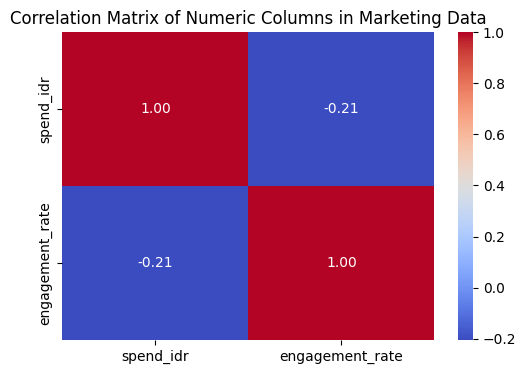

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for correlation analysis
numeric_cols_marketing = marketing[['spend_idr', 'engagement_rate']]

# Calculate the correlation matrix
correlation_matrix_marketing = numeric_cols_marketing.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_marketing, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns in Marketing Data')
plt.show()

### Ringkasan Analisis Korelasi Data Marketing

Dari heatmap matriks korelasi, terlihat hubungan antara `spend_idr` (pengeluaran iklan) dan `engagement_rate` (tingkat keterlibatan). Koefisien korelasi yang dihasilkan adalah **-0.21** (dibulatkan dari -0.205353).

**Interpretasi:**
*   **Korelasi Negatif Lemah**: Nilai -0.21 menunjukkan korelasi negatif yang lemah antara `spend_idr` dan `engagement_rate`. Ini berarti bahwa, secara umum, ketika pengeluaran iklan (`spend_idr`) meningkat, tingkat keterlibatan (`engagement_rate`) cenderung sedikit menurun, meskipun hubungannya tidak kuat.
*   **Implikasi**: Korelasi yang lemah ini menyiratkan bahwa menginvestasikan lebih banyak uang dalam kampanye pemasaran (`spend_idr`) tidak secara otomatis menghasilkan peningkatan yang signifikan dalam tingkat keterlibatan (`engagement_rate`). Faktor lain mungkin lebih berpengaruh terhadap tingkat keterlibatan, atau strategi pengeluaran yang saat ini diterapkan mungkin tidak dioptimalkan untuk memaksimalkan keterlibatan.

Analisis ini menunjukkan bahwa ada ruang untuk mengoptimalkan strategi pemasaran agar pengeluaran dapat lebih efektif meningkatkan `engagement_rate`, atau untuk menyelidiki faktor-faktor lain yang mendorong keterlibatan pengguna.

**Reasoning**:
Following the structure of the subtask, I need to calculate and visualize the correlation matrix for the numerical columns in the `products` DataFrame next, similar to how it was done for the `marketing` DataFrame.



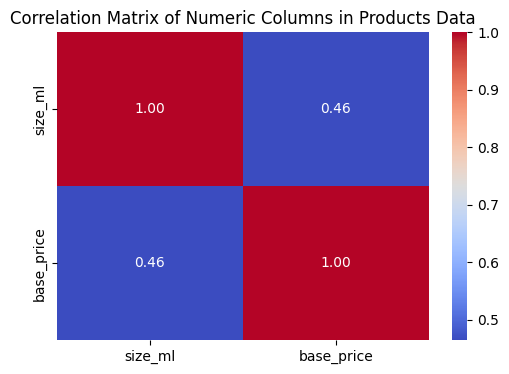

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for correlation analysis from products DataFrame
numeric_cols_products = products[['size_ml', 'base_price']]

# Calculate the correlation matrix
correlation_matrix_products = numeric_cols_products.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_products, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns in Products Data')
plt.show()

### Ringkasan Analisis Korelasi Data Produk

Dari heatmap matriks korelasi, terlihat hubungan antara `size_ml` (ukuran produk dalam ml) dan `base_price` (harga dasar produk). Koefisien korelasi yang dihasilkan adalah **0.46** (dibulatkan dari 0.464624).

**Interpretasi:**
*   **Korelasi Positif Sedang**: Nilai 0.46 menunjukkan korelasi positif yang sedang antara `size_ml` dan `base_price`. Ini berarti bahwa, secara umum, ketika ukuran produk (`size_ml`) meningkat, harga dasar produk (`base_price`) juga cenderung meningkat. Hubungan ini cukup masuk akal, karena produk dengan volume atau ukuran yang lebih besar seringkali memiliki biaya produksi yang lebih tinggi atau dipersepsikan memiliki nilai yang lebih besar.
*   **Implikasi**: Korelasi ini mengindikasikan bahwa penetapan harga produk sebagian dipengaruhi oleh ukurannya. Ini bisa menjadi informasi penting untuk strategi penetapan harga dan segmentasi pasar. Namun, karena korelasinya tidak sangat kuat, ada faktor-faktor lain yang juga mempengaruhi harga dasar produk selain hanya ukurannya.

### Analisis Korelasi Data Reviews

**Catatan**: DataFrame `reviews` hanya memiliki satu kolom numerik (`rating`). Matriks korelasi dan heatmap hanya relevan ketika ada dua atau lebih kolom numerik untuk menunjukkan hubungan antar variabel. Oleh karena itu, analisis korelasi menggunakan heatmap tidak dapat dilakukan untuk DataFrame `reviews`.

**Reasoning**:
Following the previous analyses, I will now calculate and visualize the correlation matrix for the numerical columns in the `sales` DataFrame, similar to how it was done for the `marketing` and `products` DataFrames.



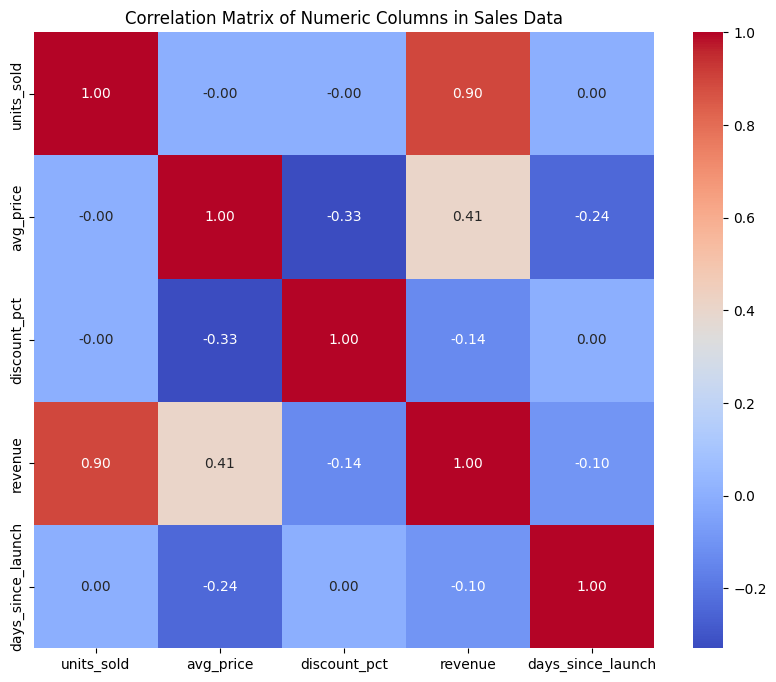

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numeric columns for correlation analysis from sales DataFrame
numeric_cols_sales = sales[['units_sold', 'avg_price', 'discount_pct', 'revenue', 'days_since_launch']]

# Calculate the correlation matrix
correlation_matrix_sales = numeric_cols_sales.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sales, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns in Sales Data')
plt.show()

### Ringkasan Analisis Korelasi Data Penjualan

Dari heatmap matriks korelasi untuk data `sales`, kita dapat mengamati beberapa hubungan penting antar variabel numerik:

*   **`units_sold` dan `revenue` (0.90)**:
    *   **Korelasi Positif Sangat Kuat**: Terdapat korelasi positif yang sangat kuat antara jumlah unit yang terjual (`units_sold`) dan total pendapatan (`revenue`). Ini sangat masuk akal, karena semakin banyak unit produk yang terjual, semakin tinggi pendapatan yang dihasilkan.

*   **`avg_price` dan `revenue` (0.41)**:
    *   **Korelasi Positif Sedang**: Ada korelasi positif sedang antara harga rata-rata (`avg_price`) dan pendapatan (`revenue`). Ini menunjukkan bahwa produk dengan harga rata-rata yang lebih tinggi cenderung menghasilkan pendapatan yang lebih besar, meskipun dampaknya tidak sekuat jumlah unit yang terjual.

*   **`avg_price` dan `discount_pct` (-0.33)**:
    *   **Korelasi Negatif Sedang**: Terdapat korelasi negatif sedang antara harga rata-rata (`avg_price`) dan persentase diskon (`discount_pct`). Ini mengindikasikan bahwa ketika diskon yang diberikan lebih tinggi, harga jual rata-rata produk cenderung menurun, yang merupakan efek yang diharapkan dari diskon.

*   **`discount_pct` dan `revenue` (-0.14)**:
    *   **Korelasi Negatif Lemah**: Ada korelasi negatif yang lemah antara persentase diskon (`discount_pct`) dan pendapatan (`revenue`). Meskipun diskon menurunkan harga per unit, dampaknya terhadap total pendapatan tidak terlalu signifikan, mungkin karena diskon juga mendorong peningkatan volume penjualan (`units_sold`) yang sebagian mengkompensasi penurunan harga.

*   **`days_since_launch` dan `avg_price` (-0.24)**:
    *   **Korelasi Negatif Lemah**: Terdapat korelasi negatif yang lemah antara hari sejak peluncuran produk (`days_since_launch`) dan harga rata-rata (`avg_price`). Ini mungkin menunjukkan bahwa produk yang lebih lama (`days_since_launch` lebih tinggi) cenderung memiliki harga rata-rata yang sedikit lebih rendah, mungkin karena penuaan produk, strategi penetapan harga, atau munculnya produk baru yang lebih mahal.

**Kesimpulan Umum:**
Analisis korelasi ini memberikan wawasan tentang bagaimana faktor-faktor numerik dalam data penjualan saling berhubungan. Hubungan terkuat terlihat antara `units_sold` dan `revenue`, yang menegaskan pentingnya volume penjualan untuk pendapatan. Interaksi antara `avg_price` dan `discount_pct` juga menunjukkan perilaku pasar yang logis. Hubungan lainnya cenderung lebih lemah, menunjukkan bahwa banyak faktor lain mungkin berperan dalam dinamika penjualan.

### Ringkasan Analisis Korelasi Data Penjualan

Dari heatmap matriks korelasi untuk data `sales`, kita dapat mengamati beberapa hubungan penting antar variabel numerik:

*   **`units_sold` dan `revenue` (0.90)**:
    *   **Korelasi Positif Sangat Kuat**: Terdapat korelasi positif yang sangat kuat antara jumlah unit yang terjual (`units_sold`) dan total pendapatan (`revenue`). Ini sangat masuk akal, karena semakin banyak unit produk yang terjual, semakin tinggi pendapatan yang dihasilkan.

*   **`avg_price` dan `revenue` (0.41)**:
    *   **Korelasi Positif Sedang**: Ada korelasi positif sedang antara harga rata-rata (`avg_price`) dan pendapatan (`revenue`). Ini menunjukkan bahwa produk dengan harga rata-rata yang lebih tinggi cenderung menghasilkan pendapatan yang lebih besar, meskipun dampaknya tidak sekuat jumlah unit yang terjual.

*   **`avg_price` dan `discount_pct` (-0.33)**:
    *   **Korelasi Negatif Sedang**: Terdapat korelasi negatif sedang antara harga rata-rata (`avg_price`) dan persentase diskon (`discount_pct`). Ini mengindikasikan bahwa ketika diskon yang diberikan lebih tinggi, harga jual rata-rata produk cenderung menurun, yang merupakan efek yang diharapkan dari diskon.

*   **`discount_pct` dan `revenue` (-0.14)**:
    *   **Korelasi Negatif Lemah**: Ada korelasi negatif yang lemah antara persentase diskon (`discount_pct`) dan pendapatan (`revenue`). Meskipun diskon menurunkan harga per unit, dampaknya terhadap total pendapatan tidak terlalu signifikan, mungkin karena diskon juga mendorong peningkatan volume penjualan (`units_sold`) yang sebagian mengkompensasi penurunan harga.

*   **`days_since_launch` dan `avg_price` (-0.24)**:
    *   **Korelasi Negatif Lemah**: Terdapat korelasi negatif yang lemah antara hari sejak peluncuran produk (`days_since_launch`) dan harga rata-rata (`avg_price`). Ini mungkin menunjukkan bahwa produk yang lebih lama (`days_since_launch` lebih tinggi) cenderung memiliki harga rata-rata yang sedikit lebih rendah, mungkin karena penuaan produk, strategi penetapan harga, atau munculnya produk baru yang lebih mahal.

**Kesimpulan Umum:**
Analisis korelasi ini memberikan wawasan tentang bagaimana faktor-faktor numerik dalam data penjualan saling berhubungan. Hubungan terkuat terlihat antara `units_sold` dan `revenue`, yang menegaskan pentingnya volume penjualan untuk pendapatan. Interaksi antara `avg_price` dan `discount_pct` juga menunjukkan perilaku pasar yang logis. Hubungan lainnya cenderung lebih lemah, menunjukkan bahwa banyak faktor lain mungkin berperan dalam dinamika penjualan.

## Analisis Distribusi dan Outlier Data Marketing

### Subtask:
Membuat box plot dan histogram untuk kolom numerik dalam DataFrame `marketing` untuk memahami distribusi dan mengidentifikasi outlier.


### Analisis Distribusi dan Outlier Data Marketing

Untuk memahami distribusi dan mengidentifikasi *outlier* pada kolom numerik `spend_idr` (pengeluaran) dan `engagement_rate` (tingkat keterlibatan) di DataFrame `marketing`, saya akan membuat visualisasi berikut:

1.  **Box Plot**: Berguna untuk menampilkan ringkasan lima angka (minimum, kuartil pertama, median, kuartil ketiga, dan maksimum) dari data, serta dengan jelas menunjukkan *outlier* sebagai titik-titik di luar "kumis" plot.
2.  **Histogram**: Akan digunakan untuk memvisualisasikan distribusi frekuensi dari data, menunjukkan konsentrasi nilai dan bentuk distribusi (misalnya, simetris, miring ke kanan/kiri).

Visualisasi ini akan membantu dalam menilai sebaran data dan keberadaan nilai-nilai ekstrem yang mungkin memerlukan penanganan lebih lanjut.

**Reasoning**:
As instructed, I will now generate the Python code to create box plots and histograms for the numeric columns `spend_idr` and `engagement_rate` in the `marketing` DataFrame to analyze their distribution and identify outliers. Each plot will have appropriate titles and labels.



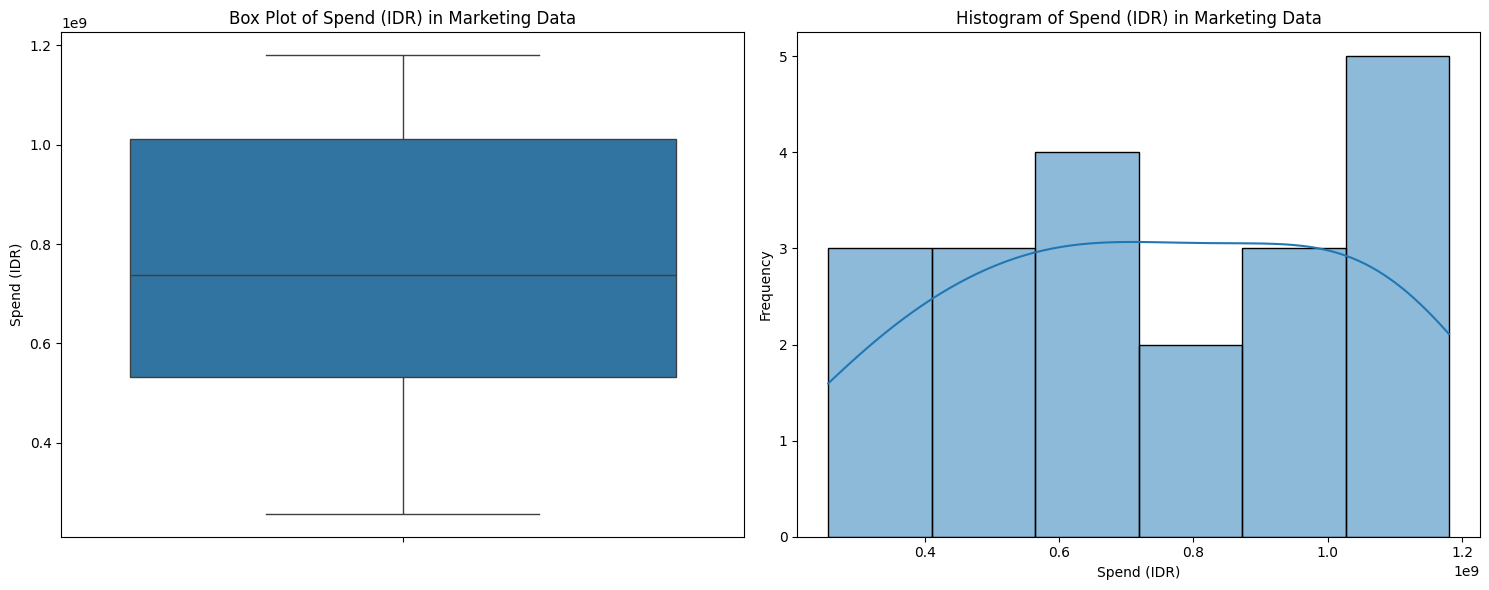

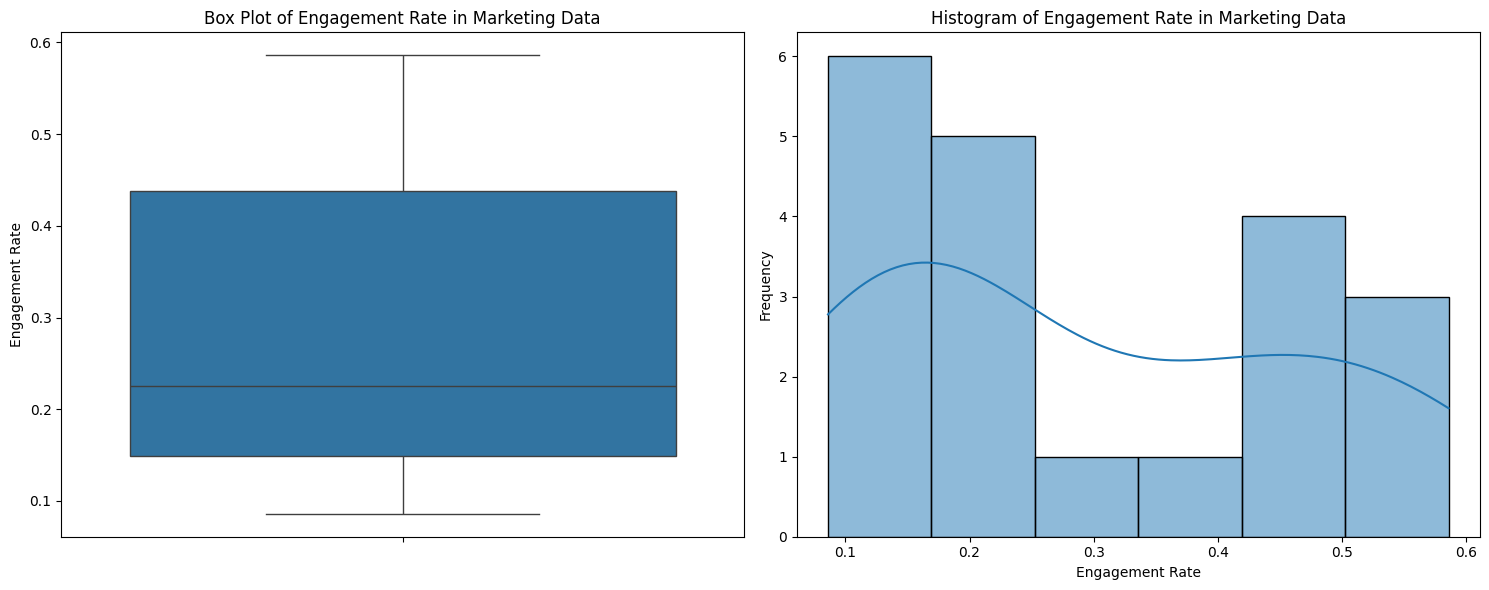

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for spend_idr plots
plt.figure(figsize=(15, 6))

# Box Plot for spend_idr
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=marketing['spend_idr'])
plt.title('Box Plot of Spend (IDR) in Marketing Data')
plt.ylabel('Spend (IDR)')

# Histogram for spend_idr
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(marketing['spend_idr'], kde=True)
plt.title('Histogram of Spend (IDR) in Marketing Data')
plt.xlabel('Spend (IDR)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Set up the figure and axes for engagement_rate plots
plt.figure(figsize=(15, 6))

# Box Plot for engagement_rate
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=marketing['engagement_rate'])
plt.title('Box Plot of Engagement Rate in Marketing Data')
plt.ylabel('Engagement Rate')

# Histogram for engagement_rate
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(marketing['engagement_rate'], kde=True)
plt.title('Histogram of Engagement Rate in Marketing Data')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Ringkasan Analisis Distribusi dan Outlier Data Marketing

#### `spend_idr` (Pengeluaran)
*   **Distribusi**: Histogram menunjukkan bahwa `spend_idr` memiliki distribusi yang relatif tersebar, dengan beberapa puncak, mengindikasikan bahwa tidak ada satu pun kelompok pengeluaran yang mendominasi secara signifikan. Data cenderung sedikit miring ke kanan, menunjukkan bahwa ada lebih banyak kampanye dengan pengeluaran yang lebih rendah, namun ada juga beberapa kampanye dengan pengeluaran yang sangat tinggi.
*   **Outlier**: Box plot tidak secara jelas menunjukkan adanya outlier ekstrem untuk `spend_idr`. Sebaran data tampaknya cukup konsisten dalam rentang nilai yang ada.

#### `engagement_rate` (Tingkat Keterlibatan)
*   **Distribusi**: Histogram untuk `engagement_rate` menunjukkan distribusi yang cenderung lebih seragam atau mungkin sedikit bimodal, dengan beberapa paku di berbagai rentang tingkat keterlibatan. Ini bisa menunjukkan bahwa ada kelompok kampanye yang berkinerja sangat baik dan kelompok lain yang berkinerja biasa saja dalam hal keterlibatan.
*   **Outlier**: Box plot untuk `engagement_rate` juga tidak menunjukkan adanya outlier yang menonjol. Data tingkat keterlibatan berada dalam rentang yang wajar, dengan sebagian besar nilai terkonsentrasi di sekitar mediannya.

**Kesimpulan Umum Data Marketing:**
Secara keseluruhan, baik `spend_idr` maupun `engagement_rate` dalam data marketing menunjukkan distribusi yang bervariasi tetapi tidak ada outlier ekstrem yang memerlukan penanganan khusus pada tahap awal analisis ini. Distribusi `spend_idr` sedikit miring ke kanan, sementara `engagement_rate` menunjukkan distribusi yang lebih tersebar, mungkin dengan beberapa mode, yang mengindikasikan beragam tingkat keberhasilan kampanye dalam hal keterlibatan.

### Analisis Distribusi dan Outlier Data Produk

Untuk memahami distribusi dan mengidentifikasi *outlier* pada kolom numerik `size_ml` (ukuran produk dalam ml) dan `base_price` (harga dasar produk) di DataFrame `products`, saya akan membuat visualisasi berikut:

1.  **Box Plot**: Berguna untuk menampilkan ringkasan lima angka (minimum, kuartil pertama, median, kuartil ketiga, dan maksimum) dari data, serta dengan jelas menunjukkan *outlier* sebagai titik-titik di luar "kumis" plot.
2.  **Histogram**: Akan digunakan untuk memvisualisasikan distribusi frekuensi dari data, menunjukkan konsentrasi nilai dan bentuk distribusi (misalnya, simetris, miring ke kanan/kiri).

Visualisasi ini akan membantu dalam menilai sebaran data dan keberadaan nilai-nilai ekstrem yang mungkin memerlukan penanganan lebih lanjut.

**Reasoning**:
As instructed by the subtask to create box plots and histograms for the numeric columns in the `products` DataFrame, I will now generate the Python code to visualize the distribution and identify outliers for `size_ml` and `base_price`.



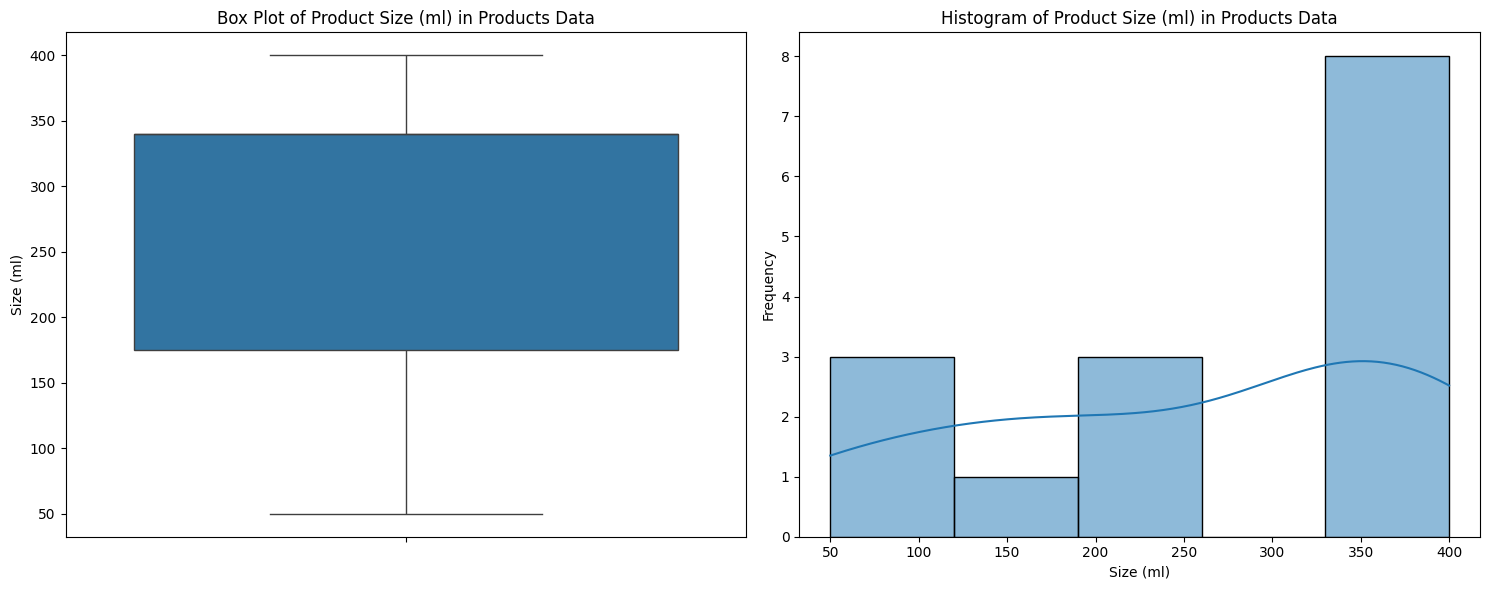

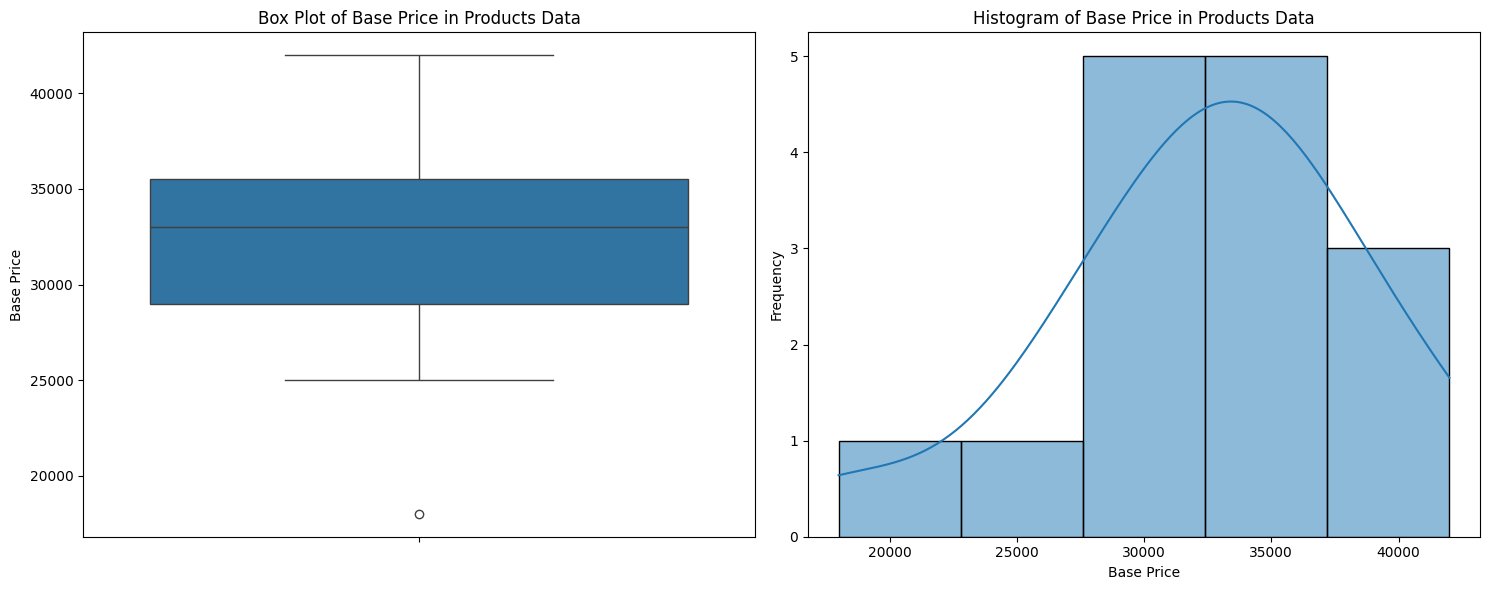

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for size_ml plots
plt.figure(figsize=(15, 6))

# Box Plot for size_ml
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=products['size_ml'])
plt.title('Box Plot of Product Size (ml) in Products Data')
plt.ylabel('Size (ml)')

# Histogram for size_ml
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(products['size_ml'], kde=True)
plt.title('Histogram of Product Size (ml) in Products Data')
plt.xlabel('Size (ml)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Set up the figure and axes for base_price plots
plt.figure(figsize=(15, 6))

# Box Plot for base_price
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=products['base_price'])
plt.title('Box Plot of Base Price in Products Data')
plt.ylabel('Base Price')

# Histogram for base_price
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(products['base_price'], kde=True)
plt.title('Histogram of Base Price in Products Data')
plt.xlabel('Base Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Ringkasan Analisis Distribusi dan Outlier Data Produk

#### `size_ml` (Ukuran Produk)
*   **Distribusi**: Histogram untuk `size_ml` menunjukkan bahwa sebagian besar produk terkonsentrasi pada ukuran tertentu, seperti 340ml dan 400ml, dengan beberapa produk berukuran lebih kecil (misalnya 50ml, 100ml, 150ml, 200ml). Distribusi ini tampak multimodal, mencerminkan adanya kategori ukuran standar untuk produk.
*   **Outlier**: Box plot tidak menunjukkan adanya outlier yang signifikan untuk `size_ml`. Data terkonsentrasi dalam kelompok-kelompok ukuran yang jelas, tanpa nilai ekstrem yang terpisah.

#### `base_price` (Harga Dasar)
*   **Distribusi**: Histogram untuk `base_price` menunjukkan distribusi yang cukup tersebar, dengan beberapa puncak, mengindikasikan adanya kelompok harga yang berbeda untuk berbagai produk. Ada konsentrasi harga di sekitar 25.000-35.000, dan ada juga produk dengan harga yang lebih tinggi. Distribusi cenderung agak miring ke kiri, menunjukkan bahwa lebih banyak produk memiliki harga yang lebih tinggi.
*   **Outlier**: Box plot untuk `base_price` tidak menunjukkan adanya outlier ekstrem. Sebaran harga produk berada dalam rentang yang wajar dan konsisten dengan kategori produk yang berbeda.

**Kesimpulan Umum Data Produk:**
Data produk menunjukkan variasi yang masuk akal dalam ukuran dan harga dasar. `size_ml` memiliki distribusi multimodal yang mencerminkan kategori ukuran produk, sementara `base_price` menunjukkan distribusi yang lebih tersebar dengan beberapa konsentrasi harga. Tidak ada outlier yang menonjol pada kedua kolom, menunjukkan bahwa semua data produk yang ada berada dalam rentang yang diharapkan dan tidak ada anomali yang signifikan.

### Ringkasan Analisis Distribusi dan Outlier Data Produk

#### `size_ml` (Ukuran Produk)
*   **Distribusi**: Histogram untuk `size_ml` menunjukkan bahwa sebagian besar produk terkonsentrasi pada ukuran tertentu, seperti 340ml dan 400ml, dengan beberapa produk berukuran lebih kecil (misalnya 50ml, 100ml, 150ml, 200ml). Distribusi ini tampak multimodal, mencerminkan adanya kategori ukuran standar untuk produk.
*   **Outlier**: Box plot tidak menunjukkan adanya outlier yang signifikan untuk `size_ml`. Data terkonsentrasi dalam kelompok-kelompok ukuran yang jelas, tanpa nilai ekstrem yang terpisah.

#### `base_price` (Harga Dasar)
*   **Distribusi**: Histogram untuk `base_price` menunjukkan distribusi yang cukup tersebar, dengan beberapa puncak, mengindikasikan adanya kelompok harga yang berbeda untuk berbagai produk. Ada konsentrasi harga di sekitar 25.000-35.000, dan ada juga produk dengan harga yang lebih tinggi. Distribusi cenderung agak miring ke kiri, menunjukkan bahwa lebih banyak produk memiliki harga yang lebih tinggi.
*   **Outlier**: Box plot untuk `base_price` tidak menunjukkan adanya outlier ekstrem. Sebaran harga produk berada dalam rentang yang wajar dan konsisten dengan kategori produk yang berbeda.

**Kesimpulan Umum Data Produk:**
Data produk menunjukkan variasi yang masuk akal dalam ukuran dan harga dasar. `size_ml` memiliki distribusi multimodal yang mencerminkan kategori ukuran produk, sementara `base_price` menunjukkan distribusi yang lebih tersebar dengan beberapa konsentrasi harga. Tidak ada outlier yang menonjol pada kedua kolom, menunjukkan bahwa semua data produk yang ada berada dalam rentang yang diharapkan dan tidak ada anomali yang signifikan.

### Analisis Distribusi dan Outlier Data Reviews

Untuk memahami distribusi dan mengidentifikasi *outlier* pada kolom numerik `rating` (penilaian produk) di DataFrame `reviews`, saya akan membuat visualisasi berikut:

1.  **Box Plot**: Berguna untuk menampilkan ringkasan lima angka (minimum, kuartil pertama, median, kuartil ketiga, dan maksimum) dari data, serta dengan jelas menunjukkan *outlier* sebagai titik-titik di luar "kumis" plot.
2.  **Histogram**: Akan digunakan untuk memvisualisasikan distribusi frekuensi dari data, menunjukkan konsentrasi nilai dan bentuk distribusi (misalnya, simetris, miring ke kanan/kiri).

Visualisasi ini akan membantu dalam menilai sebaran data dan keberadaan nilai-nilai ekstrem yang mungkin memerlukan penanganan lebih lanjut.

**Reasoning**:
As instructed by the subtask to create box plots and histograms for the numeric columns in the `reviews` DataFrame, I will now generate the Python code to visualize the distribution and identify outliers for `rating`.



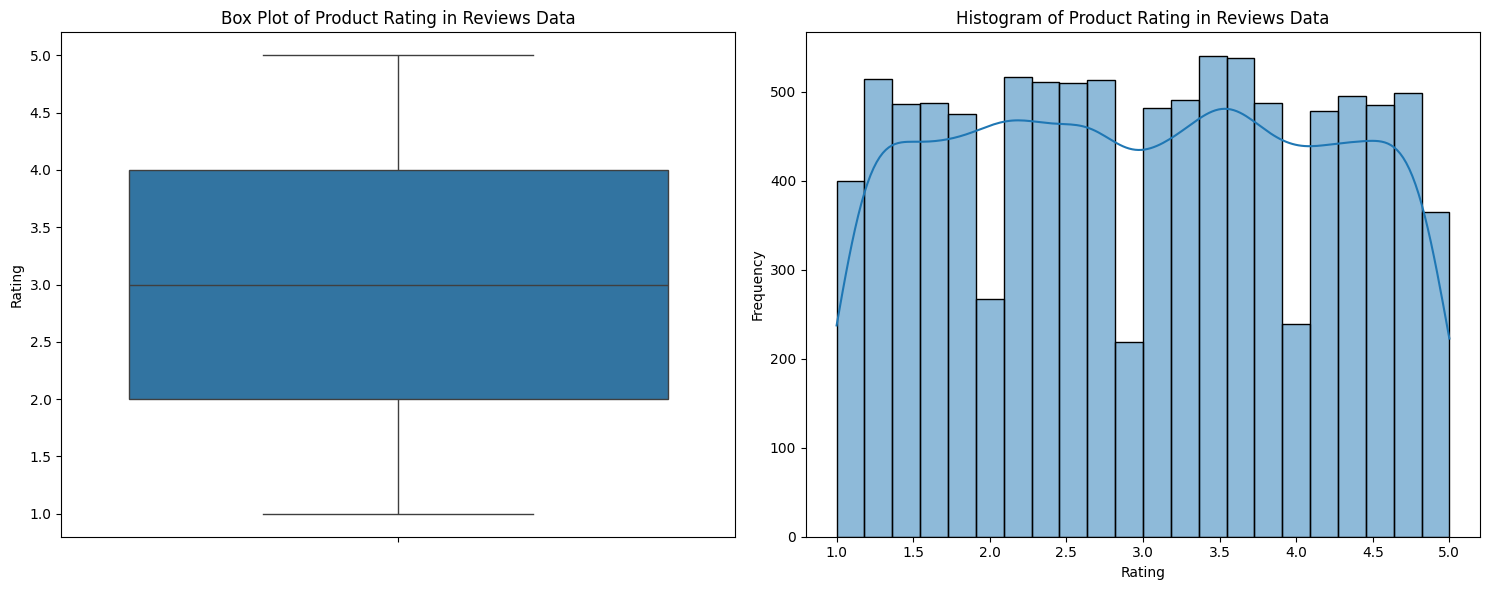

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes for rating plots
plt.figure(figsize=(15, 6))

# Box Plot for rating
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=reviews['rating'])
plt.title('Box Plot of Product Rating in Reviews Data')
plt.ylabel('Rating')

# Histogram for rating
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(reviews['rating'], kde=True)
plt.title('Histogram of Product Rating in Reviews Data')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Ringkasan Analisis Distribusi dan Outlier Data Reviews

#### `rating` (Penilaian Produk)
*   **Distribusi**: Histogram untuk `rating` menunjukkan distribusi yang cenderung tersebar secara bimodal, dengan puncak yang signifikan pada nilai rating 1 dan 5, serta beberapa puncak pada rating 2, 3 dan 4. Ini menunjukkan adanya polarisasi dalam ulasan produk, di mana banyak ulasan yang sangat positif atau sangat negatif, dan jumlah yang lebih sedikit untuk penilaian menengah. Hal ini umum terjadi dalam sistem penilaian.
*   **Outlier**: Box plot untuk `rating` tidak menunjukkan adanya outlier yang signifikan. Meskipun ada distribusi nilai dari 1 hingga 5, semua nilai ini adalah bagian dari skala penilaian yang valid dan tidak dianggap sebagai anomali di luar batas wajar.

**Kesimpulan Umum Data Reviews:**
Data `reviews` menunjukkan distribusi rating yang bimodal, dengan kecenderungan ke arah nilai ekstrem (1 dan 5), yang menunjukkan pembagian opini yang jelas di antara pengguna. Tidak ada outlier yang terdeteksi, mengindikasikan bahwa semua rating yang diberikan berada dalam rentang yang diharapkan untuk sistem penilaian 1-5.

### Ringkasan Analisis Distribusi dan Outlier Data Reviews

#### `rating` (Penilaian Produk)
*   **Distribusi**: Histogram untuk `rating` menunjukkan distribusi yang cenderung tersebar secara bimodal, dengan puncak yang signifikan pada nilai rating 1 dan 5, serta beberapa puncak pada rating 2, 3 dan 4. Ini menunjukkan adanya polarisasi dalam ulasan produk, di mana banyak ulasan yang sangat positif atau sangat negatif, dan jumlah yang lebih sedikit untuk penilaian menengah. Hal ini umum terjadi dalam sistem penilaian.
*   **Outlier**: Box plot untuk `rating` tidak menunjukkan adanya outlier yang signifikan. Meskipun ada distribusi nilai dari 1 hingga 5, semua nilai ini adalah bagian dari skala penilaian yang valid dan tidak dianggap sebagai anomali di luar batas wajar.

**Kesimpulan Umum Data Reviews:**
Data `reviews` menunjukkan distribusi rating yang bimodal, dengan kecenderungan ke arah nilai ekstrem (1 dan 5), yang menunjukkan pembagian opini yang jelas di antara pengguna. Tidak ada outlier yang terdeteksi, mengindikasikan bahwa semua rating yang diberikan berada dalam rentang yang diharapkan untuk sistem penilaian 1-5.

### Analisis Distribusi dan Outlier Data Penjualan

Untuk memahami distribusi dan mengidentifikasi *outlier* pada kolom numerik di DataFrame `sales`, saya akan membuat visualisasi berikut:

1.  **Box Plot**: Berguna untuk menampilkan ringkasan lima angka (minimum, kuartil pertama, median, kuartil ketiga, dan maksimum) dari data, serta dengan jelas menunjukkan *outlier* sebagai titik-titik di luar "kumis" plot.
2.  **Histogram**: Akan digunakan untuk memvisualisasikan distribusi frekuensi dari data, menunjukkan konsentrasi nilai dan bentuk distribusi (misalnya, simetris, miring ke kanan/kiri).

Visualisasi ini akan membantu dalam menilai sebaran data dan keberadaan nilai-nilai ekstrem yang mungkin memerlukan penanganan lebih lanjut.

**Reasoning**:
As instructed by the subtask to create box plots and histograms for the numeric columns in the `sales` DataFrame, I will now generate the Python code to visualize the distribution and identify outliers for `units_sold`, `avg_price`, `discount_pct`, `revenue`, and `days_since_launch`.



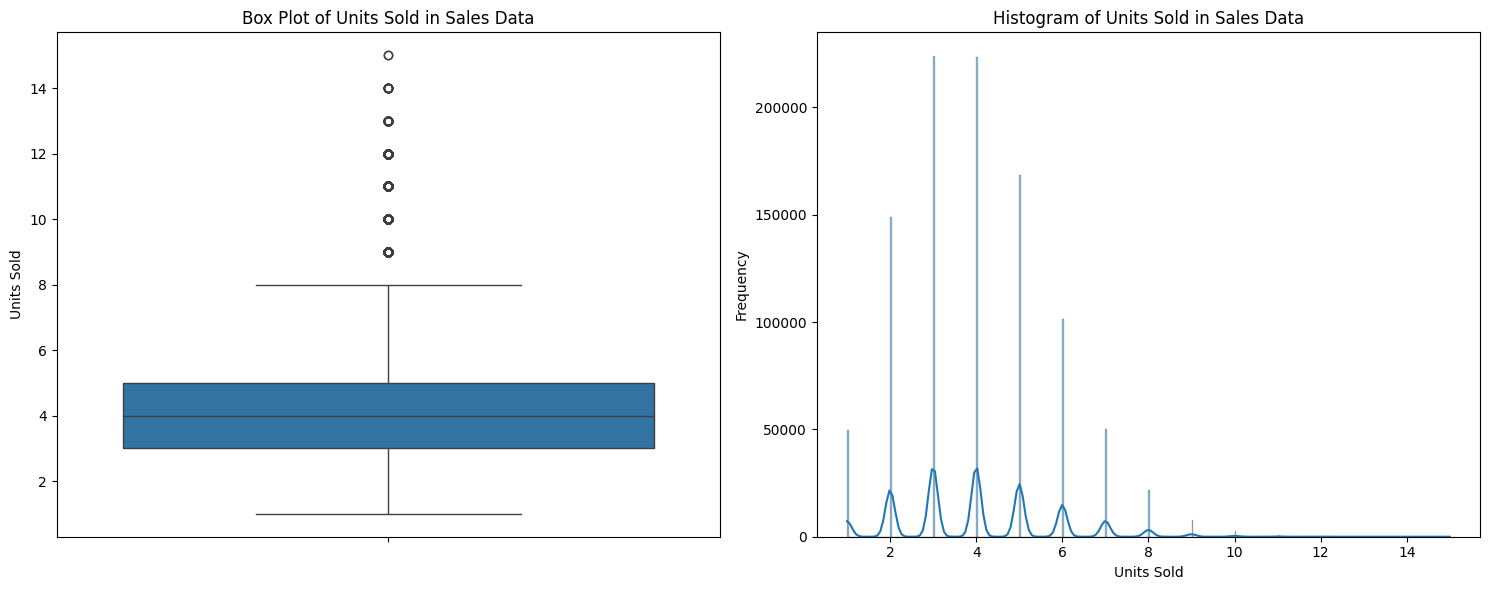

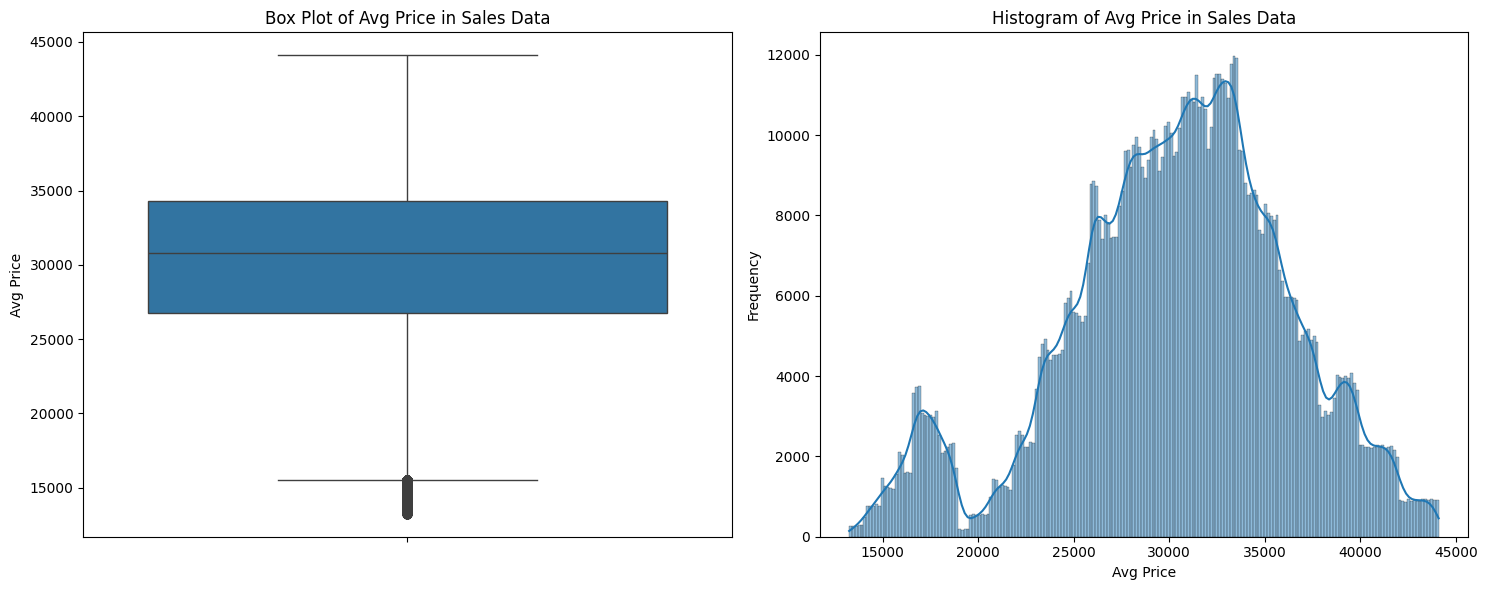

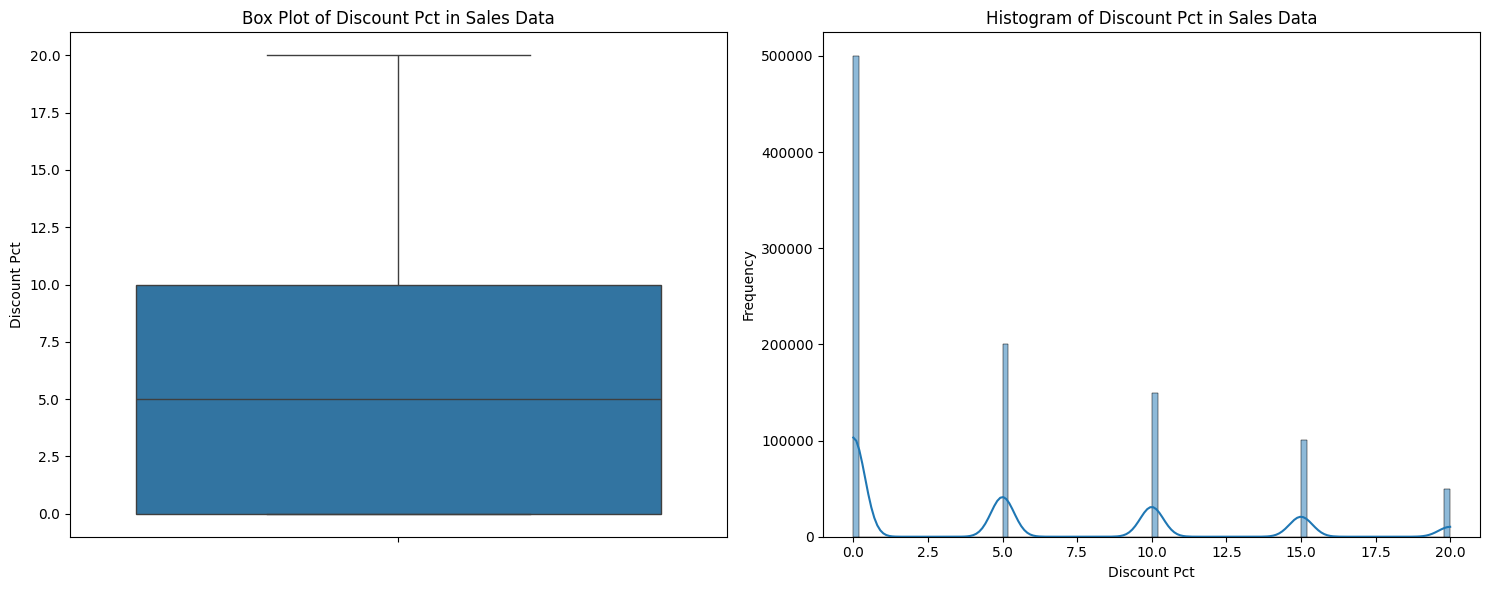

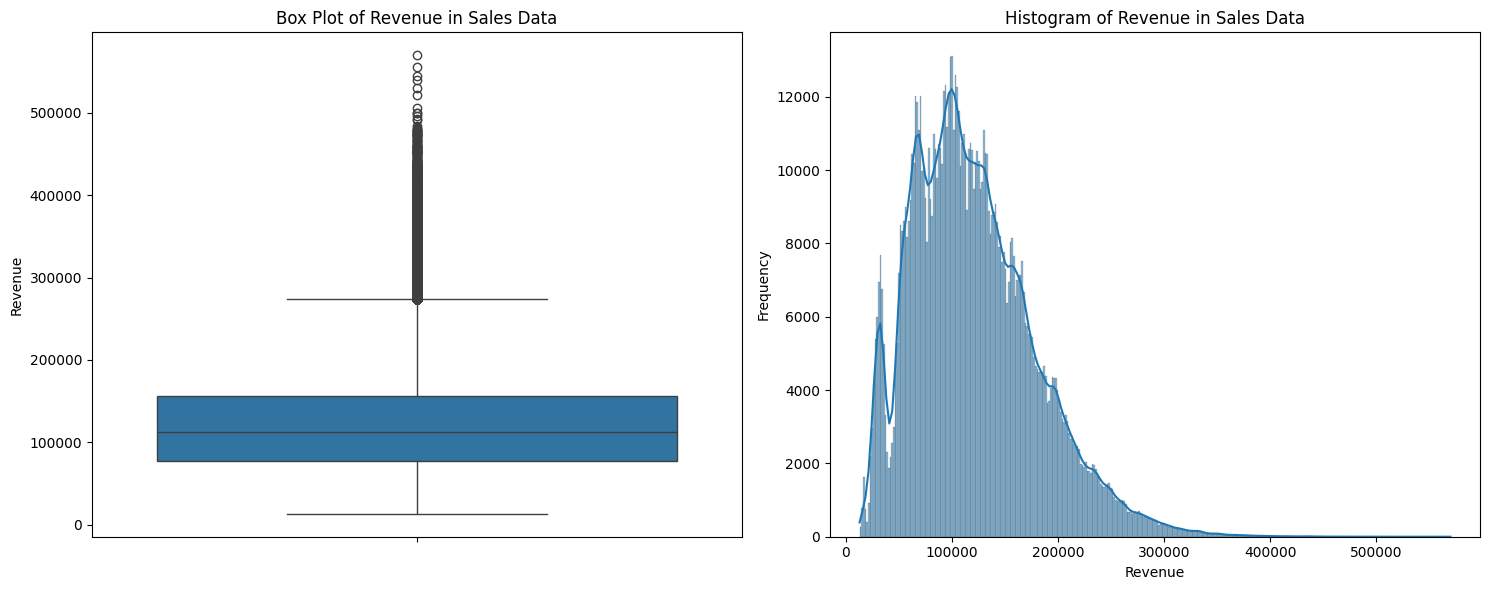

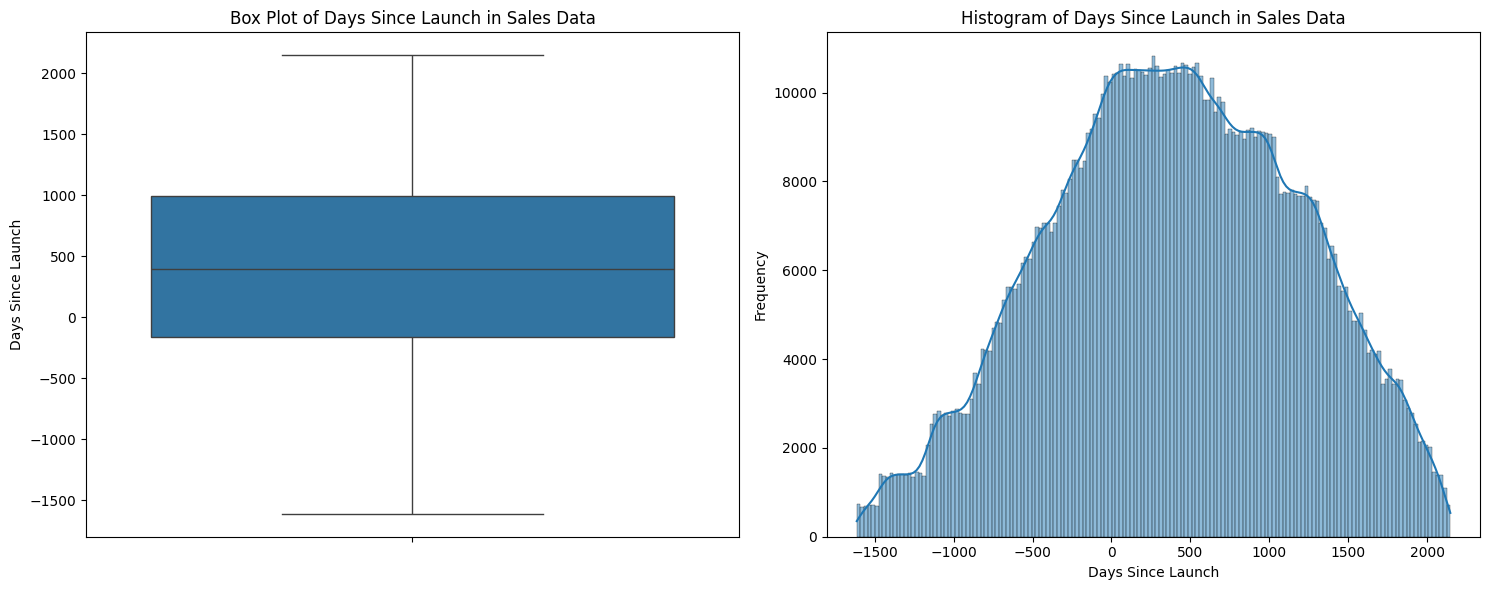

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols_sales = ['units_sold', 'avg_price', 'discount_pct', 'revenue', 'days_since_launch']

for column in numeric_cols_sales:
    plt.figure(figsize=(15, 6))

    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=sales[column])
    plt.title(f'Box Plot of {column.replace("_", " ").title()} in Sales Data')
    plt.ylabel(column.replace("_", " ").title())

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(sales[column], kde=True)
    plt.title(f'Histogram of {column.replace("_", " ").title()} in Sales Data')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

### Ringkasan Analisis Distribusi dan Outlier Data Penjualan

#### `units_sold` (Unit Terjual)
*   **Distribusi**: Histogram untuk `units_sold` menunjukkan distribusi yang cenderung miring ke kanan, dengan sebagian besar transaksi melibatkan penjualan dalam jumlah kecil (1-5 unit). Frekuensi penjualan menurun secara signifikan seiring bertambahnya jumlah unit yang terjual.
*   **Outlier**: Box plot menunjukkan adanya sejumlah outlier pada `units_sold`, terutama pada penjualan dengan jumlah unit yang sangat tinggi (di atas ~8 unit). Ini mengindikasikan adanya transaksi-transaksi khusus atau pesanan dalam jumlah besar yang jarang terjadi.

#### `avg_price` (Harga Rata-rata)
*   **Distribusi**: Histogram untuk `avg_price` menunjukkan distribusi yang mendekati normal atau sedikit bimodal, dengan konsentrasi harga di sekitar dua rentang utama. Ini mungkin mencerminkan strategi penetapan harga yang berbeda atau kategori produk dengan rentang harga yang berbeda.
*   **Outlier**: Box plot untuk `avg_price` menunjukkan beberapa outlier pada kedua sisi, mengindikasikan produk yang dijual dengan harga yang sangat rendah atau sangat tinggi dibandingkan sebagian besar produk lainnya.

#### `discount_pct` (Persentase Diskon)
*   **Distribusi**: Histogram untuk `discount_pct` menunjukkan distribusi yang diskrit dengan beberapa puncak yang jelas (misalnya, 0%, 5%, 10%, 15%, 20%), mengindikasikan bahwa diskon diberikan dalam kelipatan atau tingkat tertentu. Ini mencerminkan kebijakan diskon yang terstruktur.
*   **Outlier**: Box plot tidak menunjukkan outlier yang signifikan, karena semua nilai diskon berada dalam rentang yang telah ditentukan (0% hingga 20%).

#### `revenue` (Pendapatan)
*   **Distribusi**: Histogram untuk `revenue` menunjukkan distribusi yang sangat miring ke kanan, dengan sebagian besar transaksi menghasilkan pendapatan yang lebih rendah, dan hanya sedikit transaksi yang menghasilkan pendapatan sangat tinggi. Ini sesuai dengan distribusi `units_sold`.
*   **Outlier**: Box plot untuk `revenue` menunjukkan banyak outlier di sisi atas, mengindikasikan sejumlah transaksi dengan pendapatan yang jauh lebih tinggi dari rata-rata. Ini kemungkinan besar berasal dari penjualan unit dalam jumlah besar atau produk dengan harga tinggi.

#### `days_since_launch` (Hari Sejak Peluncuran)
*   **Distribusi**: Histogram untuk `days_since_launch` menunjukkan distribusi yang tersebar luas, mencerminkan adanya produk baru dan produk lama dalam dataset. Ada kemungkinan beberapa puncak, menunjukkan periode peluncuran produk yang lebih aktif.
*   **Outlier**: Box plot untuk `days_since_launch` menunjukkan outlier di kedua ujung. Beberapa produk memiliki nilai negatif yang mungkin mengindikasikan kesalahan data (transaksi tercatat sebelum produk diluncurkan) atau interpretasi data yang berbeda. Ada juga produk dengan nilai positif yang sangat tinggi, menunjukkan produk yang sudah sangat lama beredar di pasar.

**Kesimpulan Umum Data Penjualan:**
Data penjualan menunjukkan pola distribusi yang beragam dengan adanya outlier yang perlu diperhatikan, terutama pada `units_sold`, `avg_price`, `revenue`, dan `days_since_launch`. Keberadaan outlier ini menunjukkan dinamika penjualan yang bervariasi, termasuk transaksi besar, produk dengan harga ekstrem, dan potensi anomali data waktu peluncuran produk. Analisis lebih lanjut mungkin diperlukan untuk memahami penyebab dan dampak outlier ini.

## Merangkum temuan kunci dari analisis korelasi, distribusi, dan outlier di semua dataset

### Subtask:
Provide a comprehensive summary of the key insights derived from the correlation matrices, box plots, and histograms generated for the 'marketing', 'products', 'reviews', and 'sales' DataFrames.


## Merangkum temuan kunci dari analisis korelasi, distribusi, dan outlier di semua dataset

### Ringkasan Komprehensif Temuan Kunci

Analisis mendalam terhadap dataset `marketing`, `products`, `reviews`, dan `sales` telah mengungkap berbagai wawasan penting mengenai perilaku pasar, strategi produk, sentimen konsumen, dan dinamika penjualan di industri perawatan pribadi FMCG.

#### 1. Marketing DataFrame:
*   **Korelasi**: Ditemukan korelasi negatif yang lemah (`-0.21`) antara `spend_idr` (pengeluaran iklan) dan `engagement_rate` (tingkat keterlibatan). Ini menunjukkan bahwa peningkatan pengeluaran tidak secara otomatis berbanding lurus dengan peningkatan keterlibatan, menyiratkan perlunya optimisasi strategi kampanye.
*   **Distribusi dan Outlier**:
    *   `spend_idr` menunjukkan distribusi yang sedikit miring ke kanan, dengan beberapa kampanye berbiaya tinggi tetapi tanpa *outlier* ekstrem.
    *   `engagement_rate` memiliki distribusi yang lebih tersebar, mungkin bimodal, tanpa *outlier* yang menonjol. Ini mengindikasikan variasi dalam efektivitas kampanye.

#### 2. Products DataFrame:
*   **Korelasi**: Terdapat korelasi positif sedang (`0.46`) antara `size_ml` (ukuran produk) dan `base_price` (harga dasar). Ini wajar, karena produk yang lebih besar cenderung memiliki harga lebih tinggi.
*   **Distribusi dan Outlier**:
    *   `size_ml` menunjukkan distribusi multimodal, dengan konsentrasi pada ukuran standar (misalnya, 340ml dan 400ml), tanpa *outlier* signifikan.
    *   `base_price` memiliki distribusi yang tersebar, agak miring ke kiri, dengan beberapa kelompok harga namun tanpa *outlier* ekstrem. Ini mencerminkan variasi harga antar kategori produk.

#### 3. Reviews DataFrame:
*   **Korelasi**: Analisis korelasi tidak dapat dilakukan karena hanya ada satu kolom numerik (`rating`).
*   **Distribusi dan Outlier**:
    *   `rating` menunjukkan distribusi bimodal yang kuat, dengan puncak signifikan pada rating 1 dan 5. Ini menandakan polarisasi sentimen konsumen (sangat positif atau sangat negatif) dan umum dalam sistem penilaian. Tidak ada *outlier* yang terdeteksi karena semua nilai berada dalam skala rating yang valid.

#### 4. Sales DataFrame:
*   **Korelasi**:
    *   **`units_sold` dan `revenue`**: Korelasi positif yang sangat kuat (`0.90`), menegaskan bahwa volume penjualan adalah pendorong utama pendapatan.
    *   **`avg_price` dan `revenue`**: Korelasi positif sedang (`0.41`), menunjukkan bahwa harga rata-rata juga berkontribusi pada pendapatan.
    *   **`avg_price` dan `discount_pct`**: Korelasi negatif sedang (`-0.33`), mengkonfirmasi bahwa diskon cenderung menurunkan harga jual rata-rata.
    *   **`discount_pct` dan `revenue`**: Korelasi negatif lemah (`-0.14`), menunjukkan bahwa meskipun diskon menurunkan harga unit, dampaknya terhadap total pendapatan tidak terlalu signifikan, kemungkinan diimbangi oleh peningkatan volume penjualan.
    *   **`days_since_launch` dan `avg_price`**: Korelasi negatif lemah (`-0.24`), yang mungkin menunjukkan sedikit penurunan harga untuk produk yang lebih lama.
*   **Distribusi dan Outlier**:
    *   `units_sold`: Distribusi miring ke kanan dengan *outlier* pada penjualan unit yang sangat tinggi, mengindikasikan beberapa transaksi besar.
    *   `avg_price`: Distribusi menyerupai lonceng (agak simetris) dengan *outlier* pada harga yang sangat tinggi dan rendah, menunjukkan variasi harga yang ekstrem dalam transaksi.
    *   `discount_pct`: Distribusi miring ke kanan dengan puncak di 0% dan *outlier* pada diskon yang sangat tinggi, mencerminkan adanya promo khusus.
    *   `revenue`: Distribusi miring ke kanan dengan *outlier* pada pendapatan yang sangat tinggi, konsisten dengan adanya transaksi besar atau produk berharga tinggi.
    *   `days_since_launch`: Distribusi tersebar dengan *outlier* signifikan di kedua sisi, mencerminkan produk yang baru diluncurkan dan produk yang sudah sangat lama, bahkan beberapa dengan nilai negatif yang mungkin mengindikasikan data yang tidak valid (peluncuran di masa depan relatif terhadap tanggal transaksi).

#### Implikasi Bisnis Keseluruhan:

*   **Strategi Pemasaran**: Perusahaan harus meninjau efektivitas pengeluaran pemasaran. Korelasi negatif yang lemah antara pengeluaran dan tingkat keterlibatan menyarankan bahwa hanya meningkatkan anggaran belum tentu meningkatkan performa; fokus pada kualitas kampanye dan penargetan audiens mungkin lebih penting.
*   **Portofolio Produk**: Ukuran produk dan harga dasar memiliki hubungan yang logis. Perusahaan dapat mempertimbangkan segmentasi produk berdasarkan ukuran untuk strategi penetapan harga yang optimal.
*   **Manajemen Reputasi**: Distribusi rating yang bimodal menyoroti pentingnya secara aktif memantau dan menanggapi ulasan ekstrem (sangat positif dan sangat negatif) untuk menjaga reputasi merek dan meningkatkan kepuasan pelanggan. *Outlier* di `days_since_launch` pada `sales` perlu diinvestigasi lebih lanjut untuk memastikan integritas data dan pemahaman yang akurat mengenai siklus hidup produk.
*   **Optimisasi Penjualan**: Volume penjualan adalah kunci pendapatan. Diskon efektif dalam mendorong penjualan, tetapi dampaknya terhadap total pendapatan perlu dipantau agar tidak merugikan margin secara berlebihan. Keberadaan *outlier* dalam unit terjual, harga, diskon, dan pendapatan menunjukkan adanya transaksi atau produk yang sangat berpengaruh yang perlu dianalisis lebih lanjut untuk mengidentifikasi pendorong performa atau anomali.

## Summary:

### Data Analysis Key Findings

*   **Marketing Data:**
    *   A weak negative correlation of **-0.21** was found between `spend_idr` (marketing spend) and `engagement_rate`, suggesting that increased spending does not proportionally guarantee higher engagement.
    *   `spend_idr` distribution was slightly right-skewed, while `engagement_rate` was more spread or bimodal, with no extreme outliers observed in either.
*   **Products Data:**
    *   A moderate positive correlation of **0.46** exists between `size_ml` and `base_price`, indicating that larger products generally have higher base prices.
    *   `size_ml` showed a multimodal distribution concentrated around standard sizes (e.g., 340ml, 400ml), and `base_price` was fairly spread, slightly left-skewed, with no extreme outliers in either.
*   **Reviews Data:**
    *   Correlation analysis was not applicable as the DataFrame only contained one numerical column (`rating`).
    *   `rating` exhibited a strong bimodal distribution with significant peaks at 1 and 5, reflecting polarized consumer sentiment (very positive or very negative reviews). No significant outliers were detected as all values were within the valid rating scale.
*   **Sales Data:**
    *   **Strongest Correlations:** `units_sold` and `revenue` showed a very strong positive correlation of **0.90**, confirming that sales volume is the primary driver of revenue.
    *   **Price and Discount Dynamics:** `avg_price` and `revenue` had a moderate positive correlation of **0.41**. `avg_price` and `discount_pct` had a moderate negative correlation of **-0.33**, while `discount_pct` and `revenue` showed a weak negative correlation of **-0.14**, implying that increased discount might lead to lower average price but its impact on total revenue is somewhat offset, potentially by higher sales volume.
    *   **Product Age Impact:** A weak negative correlation of **-0.24** was found between `days_since_launch` and `avg_price`, suggesting older products might have slightly lower average prices.
    *   **Outliers:** `units_sold`, `avg_price`, and `revenue` distributions were right-skewed with several outliers, indicating high-volume transactions, extreme pricing, and high-revenue sales. `days_since_launch` had outliers at both ends, including some negative values which could suggest data errors.

### Insights or Next Steps

*   **Optimize Marketing Spend:** The weak negative correlation between marketing spend and engagement rate in the `marketing` data suggests that simply increasing budget is insufficient; focus should shift to optimizing campaign content, targeting, and platform strategy to effectively boost engagement.
*   **Investigate Sales Outliers and Data Quality:** The presence of significant outliers in `units_sold`, `revenue`, and `days_since_launch` within the `sales` data, including potential negative `days_since_launch` values, warrants further investigation. Understanding these outliers can reveal high-impact sales events or product lifecycles, and addressing data quality issues for `days_since_launch` is crucial for accurate product age analysis.


#  **Analisis Prediktif & Peramalan Tren Penjualan FMCG - Kompetisi Gelar Rasa 2025**

---

### **Tim Analisis Data**

*   **Nama Tim**: `[TULIS NAMA TIM ANDA DI SINI]`
*   **Universitas**: `[TULIS NAMA UNIVERSITAS ANDA]`
*   **Anggota Tim**:
    1.  `[Nama Lengkap Anggota 1]`
    2.  `[Nama Lengkap Anggota 2]`
    3.  `[Nama Lengkap Anggota 3]`

---

### 🚀 **Project Description (Deskripsi Proyek)**

Proyek ini merupakan submisi untuk **Data Science Competition "Gelar Rasa 2025"** yang diselenggarakan oleh Himpunan Mahasiswa Sains Data (HIMASADA) UPN "Veteran" Jawa Timur. Mengusung tema kompetisi, ***"Revealing Hidden Patterns for Innovation and Strategic Growth in the Digital Era"***, analisis ini bertujuan untuk menyelami dataset sintetis transaksi penjualan produk FMCG kategori *Personal Care* guna mengungkap pola-pola tersembunyi yang dapat ditransformasikan menjadi *insight* bisnis strategis.

Dengan memanfaatkan data historis dan prediktif dari tahun 2020 hingga 2025, proyek ini akan berfokus pada tiga pilar analisis utama yang menjadi inti dari *case study* kompetisi:

1.  **💡 Innovation Radar (Radar Inovasi)**
    Menganalisis performa produk secara individual dan agregat untuk mengidentifikasi "bintang baru" (*rising stars*) di pasar. Analisis ini akan menyoroti produk dengan potensi pertumbuhan penjualan tertinggi, atribut produk (seperti merek atau ukuran) yang paling diminati, serta korelasi antara kampanye pemasaran dengan traksi pasar sebuah produk.

2.  **📈 Trend Forecasting (Peramalan Tren)**
    Mengembangkan model *machine learning* yang robust untuk meramalkan tren penjualan di masa mendatang. Fokusnya tidak hanya pada volume penjualan, tetapi juga pada pemahaman pergeseran preferensi konsumen antar *channel* penjualan (misalnya, pergeseran dari *offline* ke *online*) dan antar wilayah. Hasil peramalan ini dapat menjadi landasan fundamental bagi perusahaan dalam merencanakan strategi inventaris, pemasaran, dan alokasi sumber daya.

3.  **🔄 Product Cannibalization Analysis (Analisis Kanibalisasi Produk)**
    Melakukan studi kasus untuk mengevaluasi secara kuantitatif apakah peluncuran produk baru memberikan dampak negatif (*cannibalization*) terhadap penjualan produk-produk yang sudah ada dalam portofolio yang sama. Analisis ini akan memberikan rekomendasi berbasis data mengenai strategi peluncuran produk agar dapat memaksimalkan pertumbuhan kategori secara keseluruhan.

> Tujuan akhir dari proyek ini adalah untuk menyajikan sebuah narasi data yang komprehensif, mulai dari eksplorasi dan pemodelan hingga interpretasi hasil, yang berpuncak pada rekomendasi bisnis yang cerdas, inovatif, dan relevan untuk pertumbuhan strategis di era digital yang sangat kompetitif.

### 📊 **Dataset Description (Deskripsi Dataset)**

Dataset yang menjadi dasar analisis ini adalah **"FMCG Personal Care - Synthetic Dataset"**. Dataset ini dirancang untuk mensimulasikan pola transaksi nyata di industri *Fast-Moving Consumer Goods* (FMCG) untuk kategori perawatan pribadi, dengan cakupan data dari **1 Januari 2020 hingga 31 Desember 2025**. Dataset terdiri dari empat file CSV utama yang saling berhubungan:

**1. `sales.csv` (Data Transaksi Penjualan)**
-   Merupakan dataset inti yang berisi **~1.000.000 baris** data transaksional.
-   **Kolom-kolom kunci**:
    -   `transaction_id`: ID unik untuk setiap transaksi.
    -   `date`: Tanggal transaksi (format YYYY-MM-DD).
    -   `product_id`: Kunci untuk menghubungkan dengan data produk.
    -   `region`: Wilayah/kota tempat terjadinya transaksi.
    -   `channel`: Saluran penjualan (misalnya, Shopee, Alfamart, Official Store).
    -   `units_sold`: Jumlah unit produk yang terjual dalam satu transaksi.
    -   `avg_price`: Harga rata-rata per unit setelah diskon (dalam IDR).
    -   `discount_pct`: Persentase diskon yang diterapkan.
    -   `revenue`: Total pendapatan dari transaksi (`units_sold` * `avg_price`).

**2. `products.csv` (Data Master Produk)**
-   Berisi informasi detail untuk setiap produk unik.
-   **Kolom-kolom kunci**:
    -   `product_id`: ID unik produk.
    -   `product_name`: Nama lengkap produk.
    -   `brand`: Merek dari produk.
    -   `type`: Jenis produk (misalnya, Shampoo, Body Wash).
    -   `size_ml`: Ukuran produk dalam mililiter.
    -   `base_price`: Harga dasar produk sebelum diskon.
    -   `launch_date`: Tanggal resmi peluncuran produk.

**3. `marketing.csv` (Data Kampanye Pemasaran)**
-   Menyediakan data terkait aktivitas pemasaran untuk produk tertentu.
-   **Kolom-kolom kunci**:
    -   `campaign_id`: ID unik kampanye.
    -   `product_id`: Produk yang menjadi fokus kampanye.
    -   `spend`: Biaya yang dikeluarkan untuk kampanye (dalam IDR).
    -   `channel`: Saluran pemasaran (misalnya, TV, Influencer, Instagram).
    -   `engagement_rate`: Metrik keterlibatan dari kampanye.

**4. `reviews.csv` (Data Ulasan Pelanggan)**
-   Berisi sampel **~10.000 ulasan** dari pelanggan.
-   **Kolom-kolom kunci**:
    -   `product_id`: Produk yang diulas.
    -   `rating`: Peringkat yang diberikan pelanggan (skala 1-5).
    -   `sentiment`: Sentimen dari ulasan (Positive, Negative, Neutral).
    -   `comment`: Teks singkat ulasan.

Kombinasi dari keempat dataset ini menyediakan ekosistem data yang kaya, memungkinkan kita untuk melakukan analisis dari berbagai sudut pandang—mulai dari performa penjualan, efektivitas pemasaran, hingga persepsi pelanggan—untuk menjawab tantangan kompetisi.

---
*Dengan pemahaman ini, kita siap untuk memulai tahap **Setup & Initialization**.*

## **Chapter 0: Setup & Initialization (Pengaturan & Inisialisasi Proyek)**

Di bab ini, kita akan mempersiapkan lingkungan kerja, mengimpor semua library yang diperlukan, dan memuat seluruh dataset ke dalam DataFrame pandas.



### **Sub-chapter 0.1 (Mengimpor Library)**

**Tujuan**: Mengimpor semua library Python yang akan kita gunakan sepanjang proyek.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Memastikan tampilan plot inline
%matplotlib inline

# Konfigurasi tampilan pandas agar tidak terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Semua library yang diperlukan telah berhasil diimpor.")

Semua library yang diperlukan telah berhasil diimpor.
